# Исследовательский анализ продаж билетов, пользовательской активности, популярности регионов и мероприятий, партнеров сервиса Яндекс Афиша в период с июня по октябрь 2024 года. Статистический анализ продуктовых гипотез


## Цели и задачи проекта

1. Выполнить предобработку данных и подготовить их к исследованию.        
        
2. Выполнить исследовательский анализ данных

    2.1  Выполнить анализ распределения заказов по сегментам и их сезонные изменения. Изучить изменение пользовательской активности или пользовательского интереса в связи с сезонностью. Анализировать динамику по таким разрезам:
    * Изучить распределение заказов по сегментам и их сезонные изменения, выполнив следующие шаги
    2.2 Изучить активность пользователей осенью 2024 года.
    * Проанализировать динамику изменений по дням
    * Изучить недельную цикличность. Выделить день недели и сравнить пользовательскую активность в будни и выходные 
    2.3. Изучить изменение популярности событий и пользовательской активности осенью 2024 года.
    * Посмотреть, как события распределены по регионам и партнёрам. Выделить ключевые регионы и партнёров, которые вносят наибольший вклад в выручку.
        * Для каждого региона посчитать уникальное количество мероприятий и общее число заказов
        * Для каждого билетного партнёра посчитать общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов.

3. Статистический анализ данных. 
    * Проверить гипотезы относительно активности пользователей мобильных и стационарных устройств, которые предполагают большую активность пользователей мобильных устройств:
        * Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
        * Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

## Описание данных

Для проекта используются данные о бронировании билетов на сервисе Яндекс Афиша за период **с 1 июня по 31 октября 2024 года**.   
Все используется три датасета, основная информация содержится в первых двух:   
1. Первый датасет `final_tickets_orders_df.csv` включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Датасет содержит следующие поля:
* `order_id` — уникальный идентификатор заказа.
* `user_id` — уникальный идентификатор пользователя.
* `created_dt_msk` — дата создания заказа (московское время).
* `created_ts_msk` — дата и время создания заказа (московское время).
* `event_id` — идентификатор мероприятия.
* `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
* `age_limit` — возрастное ограничение мероприятия.
* `currency_code` — валюта оплаты, например `rub` для российских рублей.
* `device_type_canonical` — тип устройства, с которого был оформлен заказ, например `mobile` для мобильных устройств, `desktop` для стационарных.
* `revenue` — выручка от заказа.
* `service_name` — название билетного оператора.
* `tickets_count` — количество купленных билетов.
* `total` — общая сумма заказа.
* `days_since_prev` — количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.

2. Второй датасет `final_tickets_events_df.csv` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Датасет содержит такие поля:
* `event_id` — уникальный идентификатор мероприятия.
* `event_name` — название мероприятия.
* `event_type_description` — описание типа мероприятия.
* `event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее.
* `organizers` — организаторы мероприятия.
* `region_name` — название региона.
* `city_name` — название города.
* `venue_id` — уникальный идентификатор площадки.
* `venue_name` — название площадки.
* `venue_address` — адрес площадки.

3. Третий датасет `final_tickets_tenge_df.csv` с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:
* `nominal` — номинал (100 тенге);
* `data` — дата;
* `curs` — курс тенге к рублю;
* `cdx` — обозначение валюты (`kzt`).

## Содержимое проекта

* [Цели и задачи проекта](#Цели-и-задачи-проекта)
* [Описание данных](#Описание-данных)
* [1. Загрузка данных, подключение необходимых библиотек](#1.-Загрузка-данных,-подключение-необходимых-библиотек)
    * [1.1 Загрузка данных, получение первой информации](#1.1-Загрузка-данных,-получение-первой-информации)
* [2. Предобработка данных](#2.-Предобработка-данных)
    * [2.2.1 Проверка пропусков](#2.2.1-Проверка-пропусков)   
    * [2.2.2 Корректировка названий и преобразование типов данных](#2.2.2-Корректировка-названий-и-преобразование-типов-данных)
    * [2.2.3 Проверка значений в столбцах, нормализация текстовых значений](#2.2.3-Проверка-значений-в-столбцах,-нормализация-текстовых-значений)
    * [2.2.4 Проверка на явные и неявные дубликаты](#2.2.4-Проверка-на-явные-и-неявные-дубликаты)
    * [2.2.5 Создаем дополнительные столбцы](#2.2.4-Создаем-дополнительные-столбцы)
* [3. Исследовательский анализ данных](#3.-Исследовательский-анализ-данных)
    * [3.1 Анализ распределения заказов по сегментам и их сезонные изменения](#3.1-Анализ-распределения-заказов-по-сегментам-и-их-сезонные-изменения)
        * [3.1.1 Динамика заказов по месяцам](#3.1.1-Динамика-заказов-по-месяцам)
        * [3.1.2 Распределение количества билетов в заказах по сегментам в летний и осенний периоды](#3.1.2-Распределение-количества-билетов-в-заказах-по-сегментам-в-летний-и-осенний-периоды)
            * [3.1.2.1 Визуализация распределения количества билетов в заказах по типам устройств](#3.1.2.1-Визуализация-распределения-количества-билетов-в-заказах-по-типам-устройств)
            * [3.1.2.2 Визуализация распределения количества билетов в заказах по типам мероприятий](#3.1.2.2-Визуализация-распределения-количества-билетов-в-заказах-по-типам-мероприятий)
            * [3.1.2.3 Визуализация распределения количества билетов в заказах по возрастным рейтингам](#3.1.2.3-Визуализация-распределения-количества-билетов-в-заказах-по-возрастным-рейтингам)
        * [3.1.3 Динамика выручки с одного билета](#3.1.3-Динамика-выручки-с-одного-билета)
        * [3.1.4 Промежуточный вывод](#3.1.4-Промежуточный-вывод)
    * [3.2 Осенняя активность пользователей](#3.2-Осенняя-активность-пользователей)
        * [3.2.1 Динамика общего количества заказов и количества активных пользователей (DAU)](#3.2.1-Динамика-общего-количества-заказов-и-количества-активных-пользователей-dau)
        * [3.2.2 Динамика количества активных пользователей DAU](#3.2.2-Динамика-количества-активных-пользователей-dau)
    * [3.3 Популярные события и партнеры](#3.3-Популярные-события-и-партнеры)
        * [3.3.1 Визуализация топ-10 регионов по количеству заказов и уникальному количеству мероприятий](#3.3.1-Визуализация-топ-10-регионов-по-количеству-заказов-и-уникальному-количеству-мероприятий)
        * [3.3.2 Визуализация топ-10 билетных партнеров по общей выручке и уникальному количеству мероприятий](#3.3.2-Визуализация-топ-10-билетных-партнеров-по-общей-выручке-и-уникальному-количеству-мероприятий)
* [4. Статистический анализ данных](#4.-Статистический-анализ-данных)
    * [4.1 Проверка распределения в выборках](#4.1-Проверка-распределения-в-выборках)
    * [4.2 Рассчет необходимого размера выборок](#4.2-Рассчет-необходимого-размера-выборок)
    * [4.2 Проверка продуктовых гипотез](#4.2-Проверка-продуктовых-гипотез)
        * [4.2.1 Проверка первой гипотезы](#4.2.1-Проверка-первой-гипотезы)
        * [4.2.2 Проверка второй гипотезы](#4.2.2-Проверка-второй-гипотезы)
* [5. Общий вывод и рекомендации](#5.-Общий-вывод-и-рекомендации)


## 1. Загрузка данных, подключение необходимых библиотек

### 1.1 Загрузка данных, получение первой информации

Импортируем необходимые для дальнейшей работы библиотеки

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
from statsmodels.stats.power import NormalIndPower

In [6]:
from statsmodels.stats.proportion import proportion_effectsize

In [7]:
from scipy.stats import ttest_ind

Также заранее настроим размер шрифта для подписей на диаграммах.

In [8]:
plt.rcParams.update({
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

Выгрузим все данные в 3 датафрейма для дальнейшей работы.

In [9]:
# В датафрейм 'orders' сохраним данные о заказах билетов
orders = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')

In [10]:
# В датафрейм 'events' сохраним данные о событиях
events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')

In [11]:
# В датафрейм 'tenge' сохраним информацию о курсе тенге к российскому рублю за 2024 год.
# Это потребуется для приведения всех данных к одной валюте — российским рублям.
tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

Теперь стоит взглянуть на первые строки датафреймов и их основную информацию, воспользовавшись методом `info()`.

In [12]:
# Выведем информацию по датафрейму 'orders'
display(orders.head())
display(orders.info())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

None

Получили датафрейм длиной в **290849 строк**. Видим, что данные в столбцах соответствуют названиям столбцов, названия столбцов написаны корректно.   
Типы данных соответствуют содержимому за исключением столбцов с датой (`created_dt_msk`), датой и временем (`created_ts_msk`). Их можем привести к типу `datetime`.

Также можно оптимизировать несколько столбцов понижением разрядности:
* `age_limit` с возрастным ограничением мероприятия с `int64` до `int8`;
* `tickets_count` с количеством купленных билетов — с `int64` до `int8`;
* `revenue` с выручкой с `float64` до `float32`;
* `total` с общей суммой заказа можно понизить разрядность с `float64` до `float32`;
* `days_since_prev` с количеством дней с предыдщей покупки — с `float64` до `int16`.   

Пропуски есть только в столбце `days_since_prev`. В случае, если покупки не было, будет пропуск, их обрабатывать не потребуется.   

In [13]:
# Выведем информацию по датафрейму 'events'
display(events.head())
display(events.info())

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


None

Получили датафрейм длиной в **22427 строк**. Видим, что данные в столбцах соответствуют названиям столбцов, названия столбцов написаны корректно.   
Типы данных соответствуют содержимому.   
Можно оптимизировать несколько столбцов понижением разрдяности:
* `event_id` с идентификатором мероприятия — с `int64` до `int32`;
* `city_id` с идентификатором города — с `int64` до `int32`;
* `venue_id` с идентификатором площадки — с `int64` до `int32` или `int16`.

В столбце `organizers` можно удалить префикс `№`, это позволит привести его к типу `int`.
Пропусков нет.    

In [14]:
# Выведем информацию по датафрейму 'tenge'
display(tenge.head())
display(tenge.info())

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


None

Получили датафрейм длиной в **357 строк**. Видим, что данные в столбцах соответствуют названиям столбцов, однако названия столбцов не вписываются в логику названий столбцов в основных датафрейма:
* `data` следует переименовать в `date`;
* `curs` следует переименовать в `exchange_rate`;
* `cdx` следует переименовать в `currency_code`.

Касательно типов данных — столбец `data` можно привести к типу `datetime`. Пропусков нет.   
Хотя данных совсем немного, всего 357 строк, столбец `curs` можем оптимизировать, понизив разрядность до `int8`, этого будет достаточно для значений до 127. Также можно оптимизировать столбец `curs` до `float32`, вмещающий до 5 знаков после запятой.

Ознакомившись с первой информацией о датафреймах сделаем промежуточный вывод.   
* Данные соответствуют описанию, названия столбцов корректны в датасетах `orders` и `events`. В датасете `tenge` следует переименовать 3 столбца.
* Названия столбцов оформлены в едином стиле `snake_case`.
* Пропуски присутствуют только в одном столбце, но в обработке не нуждаются и являются нормой, исходя из описания данных.
* В 10 столбцах возможна оптимизация понижением разрядности, при этом в одном из них предварительно потребуется удалить префикс, чтобы привести столбец к численному типу.
* Столбцы с датами следует привести к типу `datetime`.

---

## 2. Предобработка данных

Для удобства дальнейшей работы с данными объединим датафреймы `orders`, `events`, `tenge` в один — `orders_events`. Объединять первые два датафрейма будем по столбцу `event_id`, затем присоединим `tenge` по столбцам с датами: `created_dt_msk` и `data`.

In [15]:
# Создаем объединенный датафрейм
orders_events = orders.merge(events,
                             how='left',
                             on='event_id'
                            )
# Присоединяем таблицу с информацией о курсе тенге
orders_events = orders_events.merge(tenge,
                                    how='left',
                                    left_on='created_dt_msk',
                                    right_on='data'
                                   )

In [16]:
# Выведем информацию по объединенному датафрейму 'orders_events'
display(orders_events.head())
display(orders_events.info())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt


<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

None

При объединении появились пропуски в столбцах, перенесенных из датафрейма `events`. Судя по всему, в данных о заказах билетов присутствовали идентификаторы мероприятий, отсутствующие в таблице `events`, соответственно информации по этим мероприятиям нет.

Также для оценки объема изменений в данных и оценки эффективности оптимизации типов данных при дальнешей предобработке сохраним исходную длину датафрейма и объем использованной памяти.

In [17]:
tmp_orders_events = len(orders_events)
tmp_orders_events_mem = round(orders_events.memory_usage().sum() / 1024**2, 2)

In [18]:
print(f"Исходная длина датафрейма 'orders_events': {tmp_orders_events} строк, использовано памяти: {tmp_orders_events_mem} MB")

Исходная длина датафрейма 'orders_events': 290849 строк, использовано памяти: 64.35 MB


---

#### 2.2.1 Проверка пропусков

Сначала проверим датафреймы на пропуски с помощью функции, чтобы однозначно исключить человеческий фактор при визуальной оценке.

In [19]:
# Используем функцию для проверки количества и доли пропусков
# Если в столбце найдется пропуск, выведем на экран их количество, долю и название столбца
def null_check(df):
    nulls = []
    fulls = []
    
    for column in df.columns:
        if df[column].isna().sum() > 0:
            print(f"В столбце {column} найдены пропуски: {df[column].isna().sum()}. Доля пропусков: {round(100 * df[column].isna().sum() / df.shape[0], 2)}%\n")
            nulls.append(column)
        else:fulls.append(column)
    if nulls:
        print(f"\nНашлись пропуски в следующих столбцах: {nulls}\n")
    if fulls and nulls:
        print(f"В следующих столбцах нет пропусков: {fulls}")
    else:
        print("В датафрейме нет пропусков")

In [20]:
# Проверяем датафрейм 'orders_events'
null_check(orders_events)

В столбце days_since_prev найдены пропуски: 21940. Доля пропусков: 7.54%

В столбце event_name найдены пропуски: 238. Доля пропусков: 0.08%

В столбце event_type_description найдены пропуски: 238. Доля пропусков: 0.08%

В столбце event_type_main найдены пропуски: 238. Доля пропусков: 0.08%

В столбце organizers найдены пропуски: 238. Доля пропусков: 0.08%

В столбце region_name найдены пропуски: 238. Доля пропусков: 0.08%

В столбце city_name найдены пропуски: 238. Доля пропусков: 0.08%

В столбце city_id найдены пропуски: 238. Доля пропусков: 0.08%

В столбце venue_id найдены пропуски: 238. Доля пропусков: 0.08%

В столбце venue_name найдены пропуски: 238. Доля пропусков: 0.08%

В столбце venue_address найдены пропуски: 238. Доля пропусков: 0.08%


Нашлись пропуски в следующих столбцах: ['days_since_prev', 'event_name', 'event_type_description', 'event_type_main', 'organizers', 'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name', 'venue_address']

В следующих столбцах нет 

Как и было отмечено выше, пропуски есть только в столбце `days_since_prev`. Таким образом, может отсутстовать информация о покупках по меньшей мере 7.54% пользователей. Также видим по 238 пропусков в столбцах, добавленных из датафрейма с информацией о мероприятиях `events`. Эти строки лучше удалить: по этим мероприятиям нет никаких категориальных данных и по ним не получится провести полноценный анализ, с другой стороны — объем всего 0.08% от всех данных.

In [21]:
orders_events = orders_events.dropna(subset=['event_name'])

In [22]:
# Повторно применим функцию, убедимся в удалении всех необходимых пропусков
null_check(orders_events)

В столбце days_since_prev найдены пропуски: 21913. Доля пропусков: 7.54%


Нашлись пропуски в следующих столбцах: ['days_since_prev']

В следующих столбцах нет пропусков: ['order_id', 'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'revenue', 'service_name', 'tickets_count', 'total', 'event_name', 'event_type_description', 'event_type_main', 'organizers', 'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name', 'venue_address', 'data', 'nominal', 'curs', 'cdx']


---

#### 2.2.2 Корректировка названий и преобразование типов данных

Переименуем столбец с курсом тенге `curs` в `exchange_rate`. Переименовывать столбцы `data` и `cdx` смысла нет, лучше их удалить: `data` полностью повторяет имеющийся `created_dt_msk`, `cdx` не несет в себе смысла при дальнешей работе.

In [23]:
# Меняем название столбца на более соответсвующее общей стилистике
orders_events = orders_events.rename(columns={'curs': 'exchange_rate'})

# Удаляем бесполезные для работы столбцы
orders_events = orders_events.drop(columns=['data', 'cdx'])

Готово. Перейдем к преобразованию типов данных.

In [24]:
# Приведем столбцы с датами и временем к типу datetime
for column in ['created_dt_msk', 'created_ts_msk']:
    orders_events[column] = pd.to_datetime(orders[column])
    print(f"Тип данных столбца {column} преобразован в 'datetime'")

Тип данных столбца created_dt_msk преобразован в 'datetime'
Тип данных столбца created_ts_msk преобразован в 'datetime'


Перейдем к понижению разрядности столбцов с числовыми данными. Для выбора оптимальной разрядности взглянем на минимальные и максимальные значения столбцов.   
Но прежде подготовим столбец `organizers`: сейчас он имеет тип `object` и префикс `№`. Для оптимизации стоит удалить префикс и привести к числовому формату.

In [25]:
# Удаляем префикс, меняем тип данных на числовой
orders_events['organizers'] = orders_events['organizers'].str[1:].astype(int)

In [26]:
# Выбираем столбцы с числовыми типами данных
columns = orders_events.select_dtypes(include=['int', 'float']).columns

# Настроим отображение чисел для удобства
pd.set_option("display.float_format", "{:,.7f}".format)

# Выводим таблицу с минимальными и максимальными значениями
orders_events[columns].agg(['min', 'max']).T

,min,max
order_id,1.0000000,"8,653,108.0000000"
event_id,"4,436.0000000","592,325.0000000"
age_limit,0.0000000,18.0000000
revenue,-90.7600000,"81,174.5400000"
tickets_count,1.0000000,57.0000000
total,-358.8500000,"811,745.4000000"
days_since_prev,0.0000000,148.0000000
organizers,821.0000000,"5,114.0000000"
city_id,2.0000000,"37,172.0000000"
venue_id,894.0000000,"4,677.0000000"


По полученным диапазонам значений выберем следующие типы данных:
* **int8** для `age_limit`, `tickets_count`, `nominal`;
* **Int16** для `days_since_prev` (так как оставили пропуски);
* **int32** для столбцов: `order_id`, `event_id`, `city_id`, `venue_id`;
* **float32** для `revenue`, `total`, `exchange_rate`.

In [27]:
int8_columns = ['age_limit', 'tickets_count', 'nominal']
int16_columns = ['days_since_prev']
int32_columns = ['order_id', 'organizers', 'event_id', 'venue_id']
float32_columns = ['revenue', 'total', 'exchange_rate']

for column in int8_columns:
    orders_events[column] = orders_events[column].astype('int8')
    print(f"Столбец {column} преобразован в 'int8'")
    
for column in int16_columns:
    orders_events[column] = orders_events[column].astype('Int16')
    print(f"Столбец {column} преобразован в 'Int16'")   
    
for column in int32_columns:
    orders_events[column] = orders_events[column].astype('int32')
    print(f"Столбец {column} преобразован в 'int32'")
    
for column in float32_columns:
    orders_events[column] = orders_events[column].astype('float32')
    print(f"Столбец {column} преобразован в 'float32'")

Столбец age_limit преобразован в 'int8'
Столбец tickets_count преобразован в 'int8'
Столбец nominal преобразован в 'int8'
Столбец days_since_prev преобразован в 'Int16'
Столбец order_id преобразован в 'int32'
Столбец organizers преобразован в 'int32'
Столбец event_id преобразован в 'int32'
Столбец venue_id преобразован в 'int32'
Столбец revenue преобразован в 'float32'
Столбец total преобразован в 'float32'
Столбец exchange_rate преобразован в 'float32'


In [28]:
# Убедимся, что типы данных изменились корректно
orders_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290848
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290611 non-null  int32         
 1   user_id                 290611 non-null  object        
 2   created_dt_msk          290611 non-null  datetime64[ns]
 3   created_ts_msk          290611 non-null  datetime64[ns]
 4   event_id                290611 non-null  int32         
 5   cinema_circuit          290611 non-null  object        
 6   age_limit               290611 non-null  int8          
 7   currency_code           290611 non-null  object        
 8   device_type_canonical   290611 non-null  object        
 9   revenue                 290611 non-null  float32       
 10  service_name            290611 non-null  object        
 11  tickets_count           290611 non-null  int8          
 12  total                   290611

Теперь типы данных всех столбцов подобраны оптимально.

Перед тем, как проверять данные на дубликаты и создавать новые столбцы, взглянем на изменение длины датафрейма после работы с пропусками и объем используемой памяти после оптимизации.

In [29]:
len_diff = tmp_orders_events - len(orders_events)
len_diff_perc = round(100 * len_diff / tmp_orders_events,2)
mem_diff = round(tmp_orders_events_mem - orders_events.memory_usage().sum() / 1024**2, 2)
mem_diff_perc = round(100 * mem_diff / tmp_orders_events_mem, 2)

print(f"Длина датафрейма изменилась на {len_diff} строк или {len_diff_perc}%")
print(f"Объем используемой памяти изменился на {mem_diff} MB или {mem_diff_perc}%")
print(f"Текущая длина датафрейма: {len(orders_events)} строк")
print(f"Текущий объем используемой памяти {orders_events.memory_usage().sum() / 1024**2:.2f} MB")

Длина датафрейма изменилась на 238 строк или 0.08%
Объем используемой памяти изменился на 19.45 MB или 30.23%
Текущая длина датафрейма: 290611 строк
Текущий объем используемой памяти 44.90 MB


In [30]:
# Зафиксируем длину и объем датафрейма после работы с пропусками и оптимизации
tmp_cleaned = len(orders_events)
tmp_cleaned_mem = round(orders_events.memory_usage().sum() / 1024**2, 2)

---

#### 2.2.3 Проверка значений в столбцах, нормализация текстовых значений

Проверим значения в столбцах, **начнем с категориальных**. Для этого посчитаем количество уникальных значений в этиъ столбцах методом `nunique()`. Чтобы исключить возможные дубликаты из-за разных регистров, нормализуем текстовые данные.   

Проверим следующие столбцы:
* `cinema_circuit`;
* `age_limit`;
* `currency_code`;
* `device_type_canonical`;
* `service_name`;
* `event_type_description`;
* `event_type_main`;
* `region_name`;
* `city`;
* `venue_name`;
* `venue_address`.

In [31]:
# Воспользуемся функцией, которая сохранит в словарь 'tmp_columns_diff' те столбцы, в которых
# количество уникальных значений изменилось после приведения к нижнему регистру
def lowercase_nunique(df):
    tmp_columns_diff = {}
    tmp_columns = {}
    
    # Выбираем только текстовые столбцы с типом 'object'
    for column in df.select_dtypes(include='object').columns:
        # Сохраняем количество уникальных значений до нормализации
        before = df[column].nunique()
        # Нормализуем значения
        df[column] = df[column].str.lower()
        # Считаем количество уникальных значений после изменений
        after = df[column].nunique()
        # Считаем разницу
        diff = abs(before - after)
        tmp_columns[column] = after
        # Записываем в словарь только изменившиеся столбцы
        if diff > 0:
            tmp_columns_diff[column] = diff
    if tmp_columns_diff:
        print("Столбцы с типом 'object' приведены к нижнему регистру.")
        print("Удалены неявные дубликаты в следующих столбцах:")
        print(tmp_columns_diff)
    else:
        print("Столбцы с типdiом 'object' приведены к нижнему регистру.")
        print("Неявных дубликатов, возникших из-за разности регистров не оказалось.")
    print(f"Всего уникальных значений по 'object' столбцам:")
    return tmp_columns    

Функция готова, можем проверить датафрейм.

In [32]:
lowercase_nunique(orders_events)

Столбцы с типdiом 'object' приведены к нижнему регистру.
Неявных дубликатов, возникших из-за разности регистров не оказалось.
Всего уникальных значений по 'object' столбцам:


{'user_id': 21933,
 'cinema_circuit': 6,
 'currency_code': 2,
 'device_type_canonical': 2,
 'service_name': 36,
 'event_name': 15248,
 'event_type_description': 20,
 'event_type_main': 7,
 'region_name': 81,
 'city_name': 352,
 'venue_name': 3217,
 'venue_address': 3225}

Неявных дубликатов, вызванных записью одних и тех же значений разным регистром в данных не оказалось. Все текстовые данные приведены к единому виду в нижнем регистре.   
Стоит отдельно вручную проверить столбцы, где уникальных значений не слишком много, чтобы исключить возможные ошибки в написании.

In [33]:
# Выведем уникальны значения категориальных датафрейма 'orders'
for column in ['cinema_circuit',
               'device_type_canonical',
               'service_name',
               'event_type_description',
               'event_type_main',
               'region_name']:
    print(f"\nУникальные значения в столбце '{column}':\n")
    for value in orders_events[column].sort_values().unique().tolist():
        print(f' {value}')



Уникальные значения в столбце 'cinema_circuit':

 другое
 киномакс
 киносити
 москино
 нет
 центрфильм

Уникальные значения в столбце 'device_type_canonical':

 desktop
 mobile

Уникальные значения в столбце 'service_name':

 crazy ticket!
 show_ticket
 билет по телефону
 билеты без проблем
 билеты в интернете
 билеты в руки
 быстробилет
 быстрый кассир
 весь в билетах
 восьмёрка
 вперёд!
 выступления.ру
 городской дом культуры
 дом культуры
 дырокол
 за билетом!
 зе бест!
 карандашру
 кино билет
 край билетов
 лимоны
 лови билет!
 лучшие билеты
 мир касс
 мой билет
 облачко
 прачечная
 радио ticket
 реестр
 росбилет
 тебе билет!
 телебилет
 тех билет
 цвет и билет
 шоу начинается!
 яблоко

Уникальные значения в столбце 'event_type_description':

 балет
 выставка
 концерт
 кукольный спектакль
 музыкальный спектакль
 мюзикл
 опера
 оперетта
 подарок
 рок-мюзикл
 снегурочка
 событие
 спектакль
 спорт
 спортивное мероприятие
 фестиваль
 цирковое шоу
 шоу
 экскурсия
 ёлка

Уникальные знач

Ошибок также не видно. Перейдем к **количественным** значениям. Проверим распределения и выбросы.

Для количественных значений посмотрите на распределение и наличие выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха. Для анализа данных важными показателями являются выручка с заказа revenue и количество билетов в заказе `tickets_count`, поэтому в первую очередь проверьте данные в этих столбцах. Если найдутся выбросы в выручке с заказа revenue, то отберите значения по 99-му процентилю. Не забудьте, что данные изначально были представлены в разных валютах, поэтому разделите анализ на рубли и тенге.

In [34]:
# Взглянем на статистические показатели по выручке в рублях
orders_events[orders_events['currency_code'] == 'rub']['revenue'].describe()

count   285,542.0000000
mean        548.0115967
std         871.7078857
min         -90.7600021
25%         114.1699982
50%         346.6300049
75%         793.3200073
max      81,174.5390625
Name: revenue, dtype: float64

In [35]:
# Взглянем на статистические показатели по выручке в тенге
orders_events[orders_events['currency_code'] == 'kzt']['revenue'].describe()

count    5,069.0000000
mean     4,995.1625977
std      4,916.7597656
min          0.0000000
25%        518.0999756
50%      3,698.8300781
75%      7,397.6601562
max     26,425.8593750
Name: revenue, dtype: float64

Выручка как в рублях, так и в тенге имеет выбросы. В тенге распределение более равномерное — стандартное отклонение в тенге меньше среднего значения, тогда как в рублях оно существенно выше, что указывает на правый хвост. Кроме того, в рублях видим отрицательные значения в выручке. Также в тенге сделано существенно меньшее количество заказов. 

Визуализируем распределения выручки в обеих валютах. Будем использовать "ящик с усами".

In [36]:
orders_events.head(2)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,nominal,exchange_rate
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,"1,521.9399414",...,театр,3322,каменевский регион,глиногорск,213.0000000,3972,"сценический центр ""деталь"" групп","алл. машиностроителей, д. 19 стр. 6",100,18.6972008
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.4500122,...,выставки,4850,каменевский регион,глиногорск,213.0000000,2941,"музыкальная школа для детей ""аккаунт"" лтд","алл. шмидта, д. 9 стр. 4",100,18.3418999


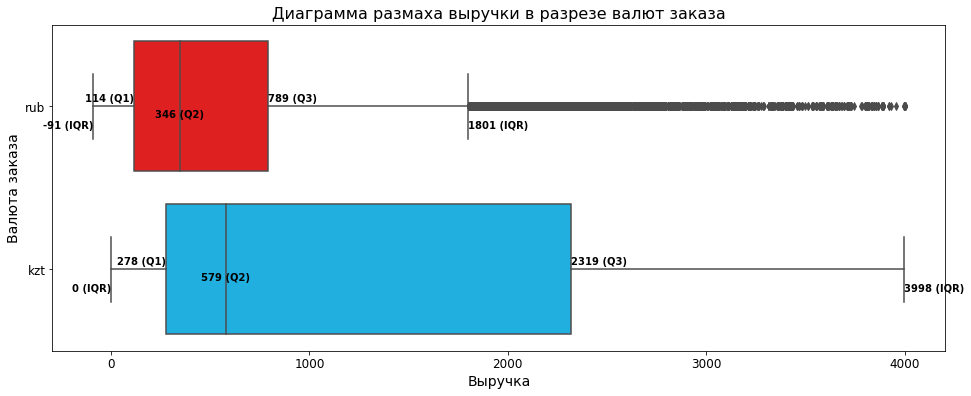

In [37]:
# Ограничиваем данные 99-м перцентилем, отсекая выбросы с аномально высокой выручкой
df = orders_events[orders_events['revenue'] <= orders_events['revenue'].quantile(0.99)]

# Строим два "ящика с усами" по выручке в разрезе валют
palette = {'rub': 'red',
           'kzt': 'deepskyblue'}
plt.figure(figsize=(16, 6))
sns.boxplot(data=df,
            x='revenue',
            y='currency_code',
            orient='h',
            palette=palette
            )

# Нанесем на график подписи со значениями: медианы, 1 и 3 квартиля, границы межквартильного размаха IQR
ax=plt.gca()
for i, currency in enumerate(df['currency_code'].unique()):
    data = df[df['currency_code'] == currency]['revenue']
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    median = data.median()
    iqr = q3 - q1
    lower = data[data >= q1 - 1.5 * iqr].min()
    upper = data[data <= q3 + 1.5 * iqr].max()

    # Подписываем границы ящика и медиану
    offset=0.05
    ax.text(lower, i + 3 * offset, f'{lower:.0f} (IQR)', va='bottom', ha='right', fontweight='semibold')
    ax.text(q1, i - offset, f'{q1:.0f} (Q1)', va='center', ha='right', fontweight='semibold')
    ax.text(median, i + offset, f'{median:.0f} (Q2)', va='center', ha='center', fontweight='semibold')
    ax.text(q3, i - offset, f'{q3:.0f} (Q3)', va='center', ha='left', fontweight='semibold')
    ax.text(upper, i + 3 * offset, f'{upper:.0f} (IQR)', va='bottom', ha='left', fontweight='semibold')

plt.xlabel('Выручка')
plt.ylabel('Валюта заказа')
plt.title('Диаграмма размаха выручки в разрезе валют заказа')
plt.show()

Видим, что распределения сильно отличаются в зависимости от валюты:
* в рублях половина заказов принесла от 113 до 789 рублей с медианой в 345 рублей;
* в тенге размах значительно больше: половина заказов принесла от 278 до 2319 рублей, медиана также выше — 579.
* заказы в рублях с выручкой более 1802 можно считать аномально прибыльными, таких выбросов в рублях довольно много, чего нельзя сказать о заказах в тенге.

Также стоит проверить общую сумму заказа, столбец `total`.

In [38]:
orders_events['total'].describe()

count   290,611.0000000
mean      7,532.2963867
std      15,332.6943359
min        -358.8500061
25%       2,160.0700684
50%       4,775.0200195
75%       8,955.9501953
max     811,745.3750000
Name: total, dtype: float64

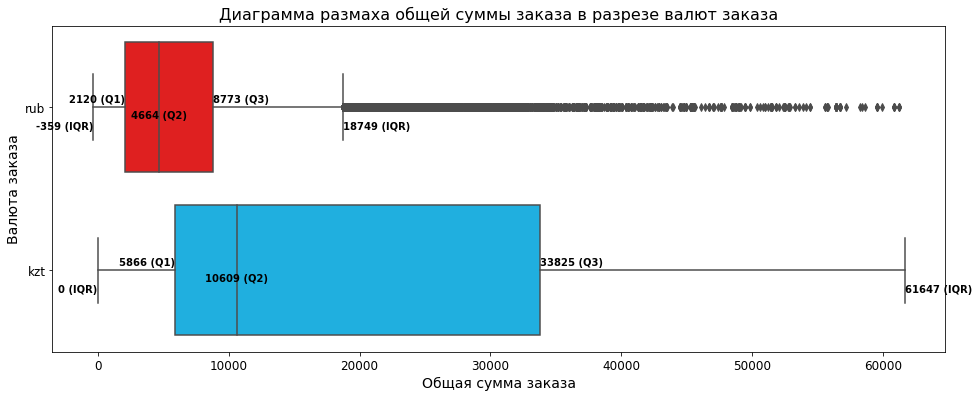

In [39]:
# Ограничиваем данные 99-м перцентилем, отсекая выбросы с аномально высокой выручкой
df = orders_events[orders_events['total'] <= orders_events['total'].quantile(0.99)]

# Строим два "ящика с усами" по выручке в разрезе валют
palette = {'rub': 'red',
           'kzt': 'deepskyblue'}
plt.figure(figsize=(16, 6))
sns.boxplot(data=df,
            x='total',
            y='currency_code',
            orient='h',
            palette=palette
            )

# Нанесем на график подписи со значениями: медианы, 1 и 3 квартиля, границы межквартильного размаха IQR
ax=plt.gca()
for i, currency in enumerate(df['currency_code'].unique()):
    data = df[df['currency_code'] == currency]['total']
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    median = data.median()
    iqr = q3 - q1
    lower = data[data >= q1 - 1.5 * iqr].min()
    upper = data[data <= q3 + 1.5 * iqr].max()
    
    # Наносим значения на график
    offset=0.05
    ax.text(lower, i + 3 * offset, f'{lower:.0f} (IQR)', va='bottom', ha='right', fontweight='semibold')
    ax.text(q1, i - offset, f'{q1:.0f} (Q1)', va='center', ha='right', fontweight='semibold')
    ax.text(median, i + offset, f'{median:.0f} (Q2)', va='center', ha='center', fontweight='semibold')
    ax.text(q3, i - offset, f'{q3:.0f} (Q3)', va='center', ha='left', fontweight='semibold')
    ax.text(upper, i + 3 * offset, f'{upper:.0f} (IQR)', va='bottom', ha='left', fontweight='semibold')

plt.xlabel('Общая сумма заказа')
plt.ylabel('Валюта заказа')
plt.title('Диаграмма размаха общей суммы заказа в разрезе валют заказа')
plt.show()

Получили распределение в целом схожее с распределением выручки, разве что диапазон значений для половины заказов в рублях находится в более узких на общем масштабе границах ящика.

Проверим минимальные и максимальные значения в столбцах с датами, возрастным ограничением, количеством билетов и дней с последней покупки.

In [40]:
# Отберем необходимые столбцы
columns = ['created_dt_msk', 'created_ts_msk', 'age_limit', 'tickets_count', 'days_since_prev']

# Выведем на экран минимальные и максимальные значения
orders_events[columns].agg(['min', 'max']).T

,min,max
created_dt_msk,2024-06-01 00:00:00,2024-10-31 00:00:00
created_ts_msk,2024-06-01 00:00:42,2024-10-31 23:59:54
age_limit,0,18
tickets_count,1,57
days_since_prev,0,148


Значения в столбцах корректны: 
* даты в диапазоне с начала июня 2024 по конец октября 2024;
* возрастные ограничения соответствуют применяемым на практике;
* максимальное количество билетов в заказе действительно большое, но не выглядит аномальным;
* количество дней с покупки также не выглядит аномальным.

Так как в столбце с выручкой обнаружили выбросы, для дальнейшей работы отфильтруем данные по выручке, оставив значения выручки по 99-му перцентилю.

In [41]:
tmp_cleaned

290611

In [42]:
# Удаляем строки с выбросами в столбце с выручкой
orders_events = orders_events[(orders_events['revenue'] < orders_events['revenue'].quantile(0.99))]

In [43]:
tmp_filtered = len(orders_events)
filtered_diff = tmp_orders_events - tmp_filtered + len_diff # считаем разницу с исходными данными, без учета удаленных пропусков
filtered_diff_perc = round(100 * filtered_diff / tmp_orders_events, 2)
print(f"После очистки выбросов в выручке данные сократились на {filtered_diff} строк, что составило {filtered_diff_perc}%")

После очистки выбросов в выручке данные сократились на 3383 строк, что составило 1.16%


---

#### 2.2.4 Проверка на явные и неявные дубликаты

Проверим данные на наличие дубликатов. Сначала посмотрим, нет ли полных дубликатов. Воспользуемся методом `duplicated()`.

In [44]:
orders_events.head(2)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,nominal,exchange_rate
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,"1,521.9399414",...,театр,3322,каменевский регион,глиногорск,213.0000000,3972,"сценический центр ""деталь"" групп","алл. машиностроителей, д. 19 стр. 6",100,18.6972008
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.4500122,...,выставки,4850,каменевский регион,глиногорск,213.0000000,2941,"музыкальная школа для детей ""аккаунт"" лтд","алл. шмидта, д. 9 стр. 4",100,18.3418999


In [45]:
print(f"Полных дубликатов в датафрейме 'orders_events': {orders_events.duplicated().sum()}")

Полных дубликатов в датафрейме 'orders_events': 0


Полных дубликатов в объединенном датафрейме не оказалось. Проверим, нет ли неявных дубликатов. Частично мы убедились в их отсутствии, проверив категориальные значения выше, а сейчас узнаем, не было ли дублирующихся заказов с разными идентификаторами. Такими будем считать строки с полностью идентичными значения во всех столбцах, кроме `order_id`, а также `currency_code`, `device_type_canonical` и `days_since_prev`: идентичный по , оформленный одним и тем же пользователем в одно и то же время. Также не будем учитывать столбцы и присоединенных таблиц `events` и `tenge`.

In [46]:
# Возьмем для проверки все столбцы, кроме 'order_id', он первый, под индексом '0'
columns = orders_events.columns[1:]

print(f"Количество неявных дубликатов в датафрейме 'orders': {orders_events.duplicated(subset=columns).sum()}")

Количество неявных дубликатов в датафрейме 'orders': 30


In [47]:
# Выбираем столбцы для поиска неявных дубликатов
columns = ['user_id',
           'created_dt_msk',
           'created_ts_msk',
           'event_id',
           'cinema_circuit',
           'age_limit',
           'revenue',
           'service_name',
           'tickets_count',
           'total']

print(f"Обнаружили неявных дубликатов по бронированиям билетов, без учета идентификатора заказа: {orders_events.duplicated(subset=columns).sum()} ")

Обнаружили неявных дубликатов по бронированиям билетов, без учета идентификатора заказа: 44 


In [48]:
# Взглянем на строки с дубликатами
orders_events[orders_events.duplicated(subset=columns, keep=False)]

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,nominal,exchange_rate
11777,1123983,06eb7897f65b433,2024-08-13,2024-08-13 16:31:07,183706,нет,18,rub,mobile,69.8199997,...,театр,1482,светополянский округ,глиноград,54.0000000,4443,"центр культурного наследия ""объединение"" и пар...","бул. карбышева, д. 50",100,18.8553009
11778,1123867,06eb7897f65b433,2024-08-13,2024-08-13 16:31:07,183706,нет,18,rub,mobile,69.8199997,...,театр,1482,светополянский округ,глиноград,54.0000000,4443,"центр культурного наследия ""объединение"" и пар...","бул. карбышева, д. 50",100,18.8553009
12696,5593202,08199117318954f,2024-07-31,2024-07-31 11:52:06,553623,нет,18,rub,mobile,0.0000000,...,другое,4549,каменевский регион,глиногорск,213.0000000,3474,"креативное пространство ""вдох"" лимитед","бул. пригородный, д. 7/1",100,18.2404003
12697,5592970,08199117318954f,2024-07-31,2024-07-31 11:52:06,553623,нет,18,rub,desktop,0.0000000,...,другое,4549,каменевский регион,глиногорск,213.0000000,3474,"креативное пространство ""вдох"" лимитед","бул. пригородный, д. 7/1",100,18.2404003
26894,1930705,0dc525d7bacbb0d,2024-07-31,2024-07-31 13:26:11,393430,нет,18,rub,desktop,"1,556.0500488",...,концерты,5048,каменевский регион,глиногорск,213.0000000,2704,"летний фестиваль ""симфония"" лтд","бул. боровой, д. 8/1 стр. 43",100,18.2404003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285615,8548012,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:56,489843,нет,18,rub,desktop,"1,319.4300537",...,театр,1858,каменевский регион,глиногорск,213.0000000,4017,"студия анимации ""точка"" инкорпорэйтед","алл. тамбовская, д. 7 к. 827",100,19.2164993
285617,8548041,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:50,489843,нет,18,rub,desktop,989.5700073,...,театр,1858,каменевский регион,глиногорск,213.0000000,4017,"студия анимации ""точка"" инкорпорэйтед","алл. тамбовская, д. 7 к. 827",100,19.2164993
285618,8548070,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:50,489843,нет,18,rub,desktop,989.5700073,...,театр,1858,каменевский регион,глиногорск,213.0000000,4017,"студия анимации ""точка"" инкорпорэйтед","алл. тамбовская, д. 7 к. 827",100,19.2164993
285619,8548099,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:56,489843,нет,18,rub,desktop,989.5700073,...,театр,1858,каменевский регион,глиногорск,213.0000000,4017,"студия анимации ""точка"" инкорпорэйтед","алл. тамбовская, д. 7 к. 827",100,19.2164993


Нашлось 44 дубликата. Немного, но их следует удалить. Различия только в идентификаторах заказа.

In [49]:
# Удаляем дубликаты
orders_events = orders_events.drop_duplicates(subset=columns)

In [50]:
# Также проверим, нет ли дубликатов по идентификаторам заказа
print(f"Дубликатов по идентификаторам заказов: {orders_events.duplicated(subset=['order_id']).sum()}")

Дубликатов по идентификаторам заказов: 0


Теперь данные очищены от дубликатов.

In [51]:
dubs_deleted = tmp_filtered - len(orders_events)
orders_events_mem = round(orders_events.memory_usage().sum() / 1024**2, 2)
mem_diff = round(tmp_orders_events_mem - orders_events_mem, 2)
mem_diff_perc = round(100 * mem_diff / tmp_orders_events_mem, 2)
len_diff = len(orders_events) - tmp_orders_events
len_perc = round(100 * len(orders_events) / tmp_orders_events, 3)
print(f"Дубликатов удалено: {dubs_deleted}")
print(f"Итого данные после предобработки уменьшились на {mem_diff} MB или {mem_diff_perc}%")
print(f"Текущая длина датафрейма: {len(orders_events)} строк, что составляет {len_perc}% от исходных данных")
print(f"Текущий объем используемой памяти: {orders_events_mem} MB")


Дубликатов удалено: 44
Итого данные после предобработки уменьшились на 19.91 MB или 30.94%
Текущая длина датафрейма: 287660 строк, что составляет 98.904% от исходных данных
Текущий объем используемой памяти: 44.44 MB


#### 2.2.5 Создаем дополнительные столбцы

Создадим несколько новых столбцов:
* `revenue_rub` — привдем выручку с заказа к единой валюте — российскому рублю. Для этого используем датасет `tenge` с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год;
* `one_ticket_revenue_rub` — рассчитаем выручку с продажи одного билета на мероприятие;
* `month` — выделим месяц оформления заказа в отдельный столбец;
* `season` — создайте столбец с информацией о сезонности.

После предобработки проверьте, сколько данных вы отобрали, если выполняли фильтрацию, а также дайте промежуточный вывод с основными действиями и описанием новых столбцов.

Сначала создадим столбец `revenue_rub`, он потребуется для создания столбца с выручкой с продажи одного билета.

In [52]:
orders_events['revenue_rub'] = orders_events['revenue']

# Считаем выручку в рублях для заказов в тенге
mask = orders_events['currency_code'] == 'kzt'
orders_events.loc[mask, 'revenue_rub'] = (orders_events.loc[mask, 'revenue'] / orders_events.loc[mask, 'nominal'] * orders_events.loc[mask, 'exchange_rate']
)

Создадим столбец `one_ticket_revenue_rub`. Для этого разделим значение столбца `revenue` с выручкой на значение столбца `tickets_count` с количеством билетов в заказе.

In [53]:
# Делим выручку на количество билетов в заказе
orders_events['one_ticket_revenue_rub'] = orders_events['revenue'] / orders_events['tickets_count']

Выделим месяц оформления заказа в отдельный столбец `month`.

In [54]:
# Выделяем номер месяца из даты оформления заказа
orders_events['month'] = orders_events['created_dt_msk'].dt.month.astype('int8')

И наконец создадим столбц с обозначением сезона. Данные охватывают только летние и осенние месяца, в коде укажем только эти два сезона.

In [55]:
# Напишем короткую функцию, выдающую название сезона в зависимости от номера месяца
def season(month):
    if 6 <= month <= 8:
        return 'лето'
    elif 9 <= month <=10:
        return 'осень'

# Создадим столбец, применив написанную выше функцию
orders_events['season'] = orders_events['month'].apply(season)

Можем теперь удалить столбцы `nominal` и `exchange_rate`, далее они не потребуются.

In [56]:
orders_events = orders_events.drop(columns=['nominal', 'exchange_rate'])

Теперь, когда все необходимые столбцы созданы, взглянем на несколько строк датафрейма и убедимся, что все прошло корректно.

In [57]:
orders_events.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,"1,521.9399414",...,каменевский регион,глиногорск,213.0000000,3972,"сценический центр ""деталь"" групп","алл. машиностроителей, д. 19 стр. 6","1,521.9399414",380.4849854,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.4500122,...,каменевский регион,глиногорск,213.0000000,2941,"музыкальная школа для детей ""аккаунт"" лтд","алл. шмидта, д. 9 стр. 4",289.4500122,144.7250061,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,"1,258.5699463",...,каменевский регион,глиногорск,213.0000000,4507,"училище искусств ""нирвана"" инк","алл. юбилейная, д. 5/6","1,258.5699463",314.6424866,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.4899998,...,североярская область,озёрск,2.0000000,3574,"театр альтернативного искусства ""ода"" лимитед","алл. есенина, д. 243 к. 3/8",8.4899998,4.2449999,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,"1,390.4100342",...,озернинский край,родниковецк,240.0000000,1896,"театр кукол ""огни"" инкорпорэйтед","ш. набережное, д. 595 стр. 8","1,390.4100342",463.4700012,10,осень


In [58]:
# В выдачу не попали заказы в тенге, отдельно посмотрим на такие строки
orders_events[orders_events['currency_code'] == 'kzt'].head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,revenue_rub,one_ticket_revenue_rub,month,season
73,7850214,0033403583a55ed,2024-09-17,2024-09-17 16:52:06,559919,нет,6,kzt,mobile,518.0999756,...,верхоречная область,серебрянка,163.0000000,1533,"клуб настольного тенниса ""фазенда"" инк","пер. семашко, д. 8/7 стр. 7",98.5037613,129.5249939,9,осень
92,8634925,0040e12d70fae81,2024-09-02,2024-09-02 19:49:14,559476,нет,6,kzt,desktop,347.1799927,...,верхоречная область,серебрянка,163.0000000,1533,"клуб настольного тенниса ""фазенда"" инк","пер. семашко, д. 8/7 стр. 7",65.7315903,115.7266617,9,осень
99,7625522,0054b38b2653e6e,2024-09-09,2024-09-09 18:06:04,559582,нет,6,kzt,mobile,328.7699890,...,верхоречная область,серебрянка,163.0000000,1533,"клуб настольного тенниса ""фазенда"" инк","пер. семашко, д. 8/7 стр. 7",61.1482620,82.1924973,9,осень
473,2229782,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:17:35,533803,нет,16,kzt,mobile,"3,698.8300781",...,шанырский регион,широковка,162.0000000,3407,"арт-кафе ""речка"" лимитед","алл. путейская, д. 548 стр. 7",739.1482544,"1,849.4150391",6,лето
528,2044327,01370a0e9c1a7d5,2024-09-05,2024-09-05 16:13:00,561747,нет,16,kzt,mobile,361.0799866,...,шанырский регион,синеводск,"29,463.0000000",3407,"арт-кафе ""речка"" лимитед","алл. путейская, д. 548 стр. 7",66.5170670,90.2699966,9,осень


Предобработка данных выполнена.   
Что было сделано:
* данные проверены на наличие пропусков:
    * `21913 пропусков` обнаружилось в столбце `days_since_prev`, они означают, что у пользователя не было покупок и обрабатывать их не потребовалось;
    * `238 пропусков` обнаружилось в столбцах таблицы `events` при создании объединенного датафрейма `orders_events`. Они были вызваны отсутствием информации по некоторым мероприятиям, присутствовавших в данных о заказах билетов в таблице `events`, эти пропуски удалили;
* оптимизированы типы данных, это позволило уменьшить объем используемой памяти на 30%;
* проверены значения в категориальных и количественных столбцах:
    * в категориальных значениях ошибок и неявных дубликатов не нашлось;
    * в количественных значениях обнаружены выбросы в выручке по заказам в рублях, для работы с этими данными стоит выборку значений столбца `revenue` 99-м перцентилем;
* отфильтровали данные, отбросив выбросы по значениям столбца `revenue` с выручкой, оставив данные по 99-му перцентилю:
    * при этом было отфильтровано `3383` строки или `1.16%` от исходных данных;
* данные проверены на наличие дубликатов:
    * удалили `44 неявных дубликата`, связанных с бронирование билетов без учета номера заказа;
    * полных дубликатов в данных не нашлось;
* создано 4 новых столбца:
    * `revenue_rub` — посчитали выручку в рублях для всех заказов, конвертировав выручку заказов в тенге по курсу валюты на день даты оформления заказов;
    * `one_ticket_revenue_rub` — посчитали выручку с продажи одного билета на мероприятие;
    * `month` — в отдельный столбец выделили месяц оформления заказа;
    * `season` — в отдельный столбец выделили сезон оформления заказа, чтобы разделить данные на летний и осенний период.

Объединенный датафрейм `orders_events` подготовлен к исследовательскому анализу.


---

## 3. Исследовательский анализ данных

### 3.1 Анализ распределения заказов по сегментам и их сезонные изменения

#### 3.1.1 Динамика заказов по месяцам

In [59]:
orders_dynamic = orders_events.groupby('month').agg(
    total_orders=('order_id', 'count')
).reset_index()

In [60]:
orders_dynamic['month_name'] = pd.to_datetime(orders_dynamic['month'], format='%m').dt.month_name(locale='ru_RU')


In [61]:
orders_dynamic

,month,total_orders,month_name
0,6,32659,Июнь
1,7,40736,Июль
2,8,44705,Август
3,9,69676,Сентябрь
4,10,99884,Октябрь


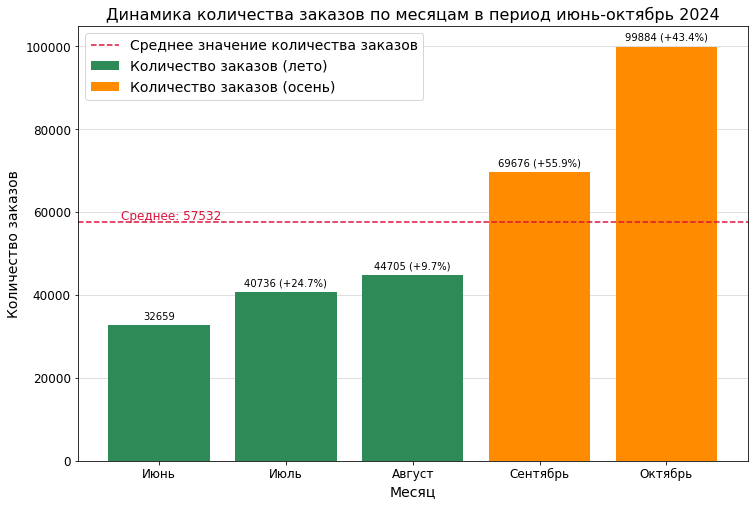

In [62]:
# Посчитаем среднее значение метрики, далее нанесем на график в виде вспомогательной линии
mean_total_orders = orders_dynamic['total_orders'].mean()

# Разделим данные на лето и осень, чтобы выделить их разными цветами
summer = orders_dynamic[orders_dynamic['month'].isin([6, 7, 8])]
autumn = orders_dynamic[orders_dynamic['month'].isin([9, 10])]

plt.figure(figsize=(12, 8))

# Строим столбчатую диаграмму по летним месяцам
summer_bars = plt.bar(summer['month_name'], summer['total_orders'],
        color='seagreen', label='Количество заказов (лето)', zorder=2)

# Строим столбчатую диаграмму по осенним месяцам
autumn_bars = plt.bar(autumn['month_name'], autumn['total_orders'],
        color='darkorange', label='Количество заказов (осень)', zorder=2)

# Нанесем горизонтальную линию со средним значением метрики за весь период
plt.axhline(mean_total_orders,
            linestyle='--',
            color='crimson',
            label='Среднее значение количества заказов'
           )
# Нанесем среднее значение метрики на график
plt.text(-0.3, mean_total_orders,
         f'Среднее: {mean_total_orders:.0f}',
         color='crimson',
         va='bottom', ha='left',
         fontsize=12
        )

# Нанесем значения метрики на столбцы, в скобках добавим относительное изменение в сравнении с предыдущим месяцем
prev_value = None
for bar in list(summer_bars) + list(autumn_bars):
    height = bar.get_height()
    
    if prev_value is not None and prev_value != 0:
        change_pct = (height - prev_value) / prev_value * 100
        label = f'{height} ({change_pct:+.1f}%)'
    else:
        label = f'{height}'  # для первого месяца нет сравнения
    
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1000,
             label, ha='center', va='bottom', fontsize=10, color='black')
    
    prev_value = height
    
    

plt.legend(loc='upper left')
plt.title('Динамика количества заказов по месяцам в период июнь-октябрь 2024')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.grid(axis='y', alpha=0.5)
plt.show()

Динамика количества заказов в исследуемый период имела тенденцию к росту. Так, в летний период в июле и августе метрика росла на **24.7%** и **9.7%** относительно предыдущего месяца.   
В осенние месяцы рост существенно ускрорился и составил уже **55.9% в сентябре** и **43.4% в октябре**. Важно, что осенью при большем относительном росте изменения происходили относительно большей базы, соответственно количественный прирост и его влияние еще более существенны.




---

#### 3.1.2 Распределение количества билетов в заказах по сегментам в летний и осенний периоды

In [63]:
# Создадим таблицу со сгруппированными по всем рассматриваемым сегментам данными, найдем общее количество заказов
# На основе этой таблицы отберем данные для визуализации всех трех сегментов в отдельности
tickets_dynamic = orders_events.groupby(['season', 'device_type_canonical', 'event_type_main', 'age_limit'], as_index=False).agg(
    total_orders=('order_id', 'count')
)



In [64]:
# Создаем сводную таблицу для сравнения распределения по типам устройств
tickets_dynamic_devices = tickets_dynamic.pivot_table(
    index='device_type_canonical',
    columns='season',
    values='total_orders',
    aggfunc='sum'
).reset_index()

# Считаем разницу по метрике в процентах
tickets_dynamic_devices['share_diff'] = ((tickets_dynamic_devices['осень'] - tickets_dynamic_devices['лето']) / tickets_dynamic_devices['лето'] * 100)

In [65]:
tickets_dynamic_devices

season,device_type_canonical,лето,осень,share_diff
0,desktop,22611,34551,52.8061563
1,mobile,95489,135009,41.3869660


In [66]:
# Создаем сводную таблицу для сравнения распределения по типу мероприятий
tickets_dynamic_events = tickets_dynamic.pivot_table(
    index='event_type_main',
    columns='season',
    values='total_orders',
    aggfunc='sum'
).reset_index()

# Считаем разницу по метрике в процентах
tickets_dynamic_events['share_diff'] = ((tickets_dynamic_events['осень'] - tickets_dynamic_events['лето']) / tickets_dynamic_events['лето'] * 100)

In [67]:
tickets_dynamic_events

season,event_type_main,лето,осень,share_diff
0,выставки,2416,2437,0.8692053
1,другое,32516,33280,2.3496125
2,концерты,49380,63325,28.2401782
3,спорт,3010,18880,527.2425249
4,стендап,6381,6944,8.8230685
5,театр,24122,42982,78.1858884
6,ёлки,275,1712,522.5454545


In [68]:
# Создаем сводную таблицу для сравнения распределения по возрастным рейтингам
tickets_dynamic_age = tickets_dynamic.pivot_table(
    index='age_limit',
    columns='season',
    values='total_orders',
    aggfunc='sum'
).reset_index()

# Считаем разницу по метрике в процентах
tickets_dynamic_age['share_diff'] = ((tickets_dynamic_age['осень'] - tickets_dynamic_age['лето']) / tickets_dynamic_age['лето'] * 100)

In [69]:
tickets_dynamic_age

season,age_limit,лето,осень,share_diff
0,0,21606,39863,84.4996760
1,6,21945,30172,37.4891775
2,12,23391,37378,59.7965029
3,16,33213,44388,33.6464637
4,18,17945,17759,-1.0365004


Перейдем к построению визуализаций распределений по сегментам. Во всех случаях будем использовать столбчатые диаграммы.

##### 3.1.2.1 Визуализация распределения количества билетов в заказах по типам устройств

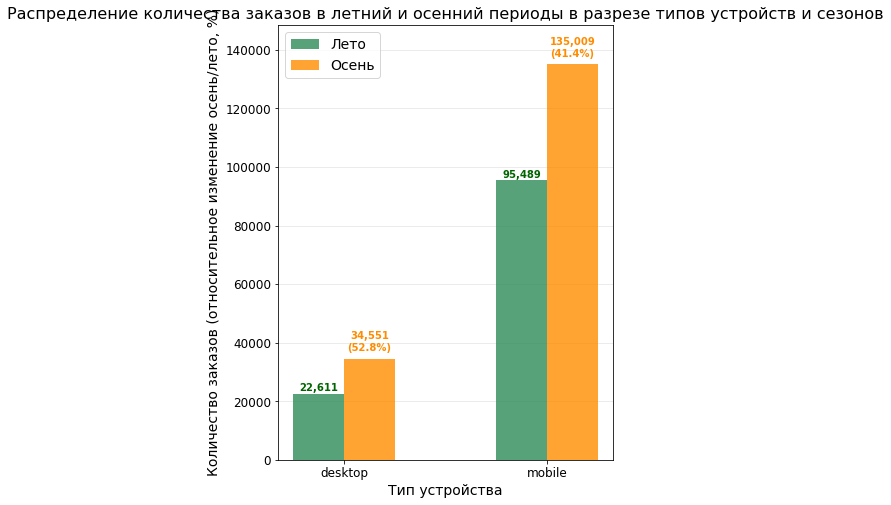

In [70]:
# Отсортируем данные по убыванию величины относительной разницы количества заказов
tickets_dynamic_devices_sorted = tickets_dynamic_devices.sort_values('share_diff', ascending=False)

x_labels = tickets_dynamic_devices_sorted['device_type_canonical']
x = np.arange(len(x_labels))
y1 = tickets_dynamic_devices_sorted['лето']
y2 = tickets_dynamic_devices_sorted['осень']
width = 0.25

# Строим столбчатые диаграммы. Разобъем график на две отдельные диаграммы, чтобы была видна относительная разница в значениях
fig, ax = plt.subplots(figsize=(6, 8))

# Летние значения
ax.bar(x-width/2, y1, width,
       label='Лето',
       color='seagreen',
       alpha=0.8,
       zorder=3)

# Осенние значения
ax.bar(x+width/2, y2, width,
       label='Осень',
       color='darkorange',
       alpha=0.8,
       zorder=3)

# Подпишем значения относительных изменений осенних значений
for i, (val1, val2, change) in enumerate(zip(y1, y2, tickets_dynamic_devices_sorted['share_diff'])):
    # Летние значения
    ax.text(i-width/2, val1 + 2000, f"{val1:,}", ha='center', va='center',
            fontsize=10, color='darkgreen', fontweight='semibold')
    
    # Осенние значения
    ax.text(i+width/2, val2 + 2000, f"{val2:,}\n({change:.1f}%)", ha='center', va='bottom',
            fontsize=10, color='darkorange', fontweight='semibold')

# Настроим верхнюю границу диаграммы
ymax = max(y1.max(), y2.max())
ax.set_ylim(0, ymax * 1.1)

ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Количество заказов (относительное изменение осень/лето, %)')
ax.set_xlabel('Тип устройства')
ax.set_title('Распределение количества заказов в летний и осенний периоды в разрезе типов устройств и сезонов')
ax.legend(loc='upper left')
ax.grid(axis='y', alpha=0.3)

plt.show()

В осенний период произошел существенный рост количества заказов как с десктопов, где количество увеличилось на **52.8%** и составило **34 551 заказ**, так и с мобильных устройств: здесь рост на **41.4%** с **135 009 заказов**.

##### 3.1.2.2 Визуализация распределения количества билетов в заказах по типам мероприятий

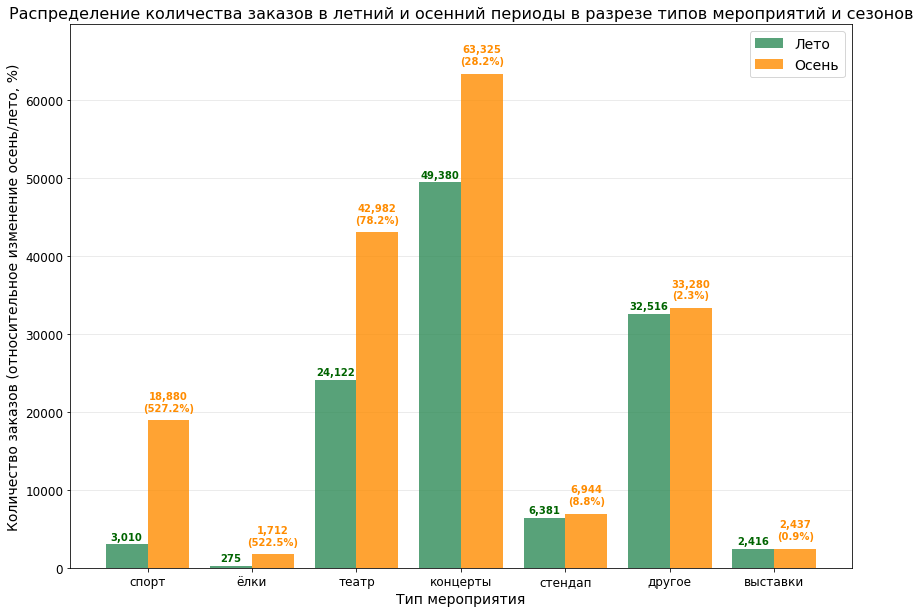

In [71]:
# Отсортируем данные по убыванию величины относительной разницы количества заказов
tickets_dynamic_events_sorted = tickets_dynamic_events.sort_values('share_diff', ascending=False)

x_labels = tickets_dynamic_events_sorted['event_type_main']
x = np.arange(len(x_labels))
y1 = tickets_dynamic_events_sorted['лето']
y2 = tickets_dynamic_events_sorted['осень']
width = 0.4

# Строим столбчатые диаграммы. Разобъем график на две отдельные диаграммы, чтобы была видна относительная разница в значениях
fig, ax = plt.subplots(figsize=(14, 10))

# Летние значения
ax.bar(x-width/2, y1, width,
       label='Лето',
       color='seagreen',
       alpha=0.8,
       zorder=3)

# Осенние значения
ax.bar(x+width/2, y2, width,
       label='Осень',
       color='darkorange',
       alpha=0.8,
       zorder=3)

# Подпишем значения относительных изменений осенних значений
for i, (val1, val2, change) in enumerate(zip(y1, y2, tickets_dynamic_events_sorted['share_diff'])):
    # Летние значения
    ax.text(i-width/2, val1 + 1000, f"{val1:,}", ha='center', va='center',
            fontsize=10, color='darkgreen', fontweight='semibold')
    
    # Осенние значения
    ax.text(i+width/2, val2 + 1000, f"{val2:,}\n({change:.1f}%)", ha='center', va='bottom',
            fontsize=10, color='darkorange', fontweight='semibold')

# Настроим верхнюю границу диаграммы
ymax = max(y1.max(), y2.max())
ax.set_ylim(0, ymax * 1.1)

ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Количество заказов (относительное изменение осень/лето, %)')
ax.set_xlabel('Тип мероприятия')
ax.set_title('Распределение количества заказов в летний и осенний периоды в разрезе типов мероприятий и сезонов')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.show()

В осенний период рост также наблюдался и по всем типам мероприятий, при этом относительная величина роста очень разнится и составила **0.9% до 527.2%** в зависимости от категории:
* так, наибольший относительный рост был в следующих категориях:
    * `спорт` +527.2%
    * `ёлки` +522.5% 
    
    Однако здесь имеет место эффект низкой базы, количество заказов летом было на низком уровне: 3010 и 275 соответственно.
* наиболее интересен рост в двух категориях:
    * `театр` — здесь заказов стало больше на **78.2%**, а количество выросло **с 24 122 до 42 982** заказов;
    * `концерты` — здесь заказов стало больше на **28.2%**, а количество выросло **с 49 380 до 63 325** заказов.

В категориях `стендап`, `другое` и `выставки` изменения едва заменты: **от 0.9% до 8.8%**.

##### 3.1.2.3 Визуализация распределения количества билетов в заказах по возрастным рейтингам

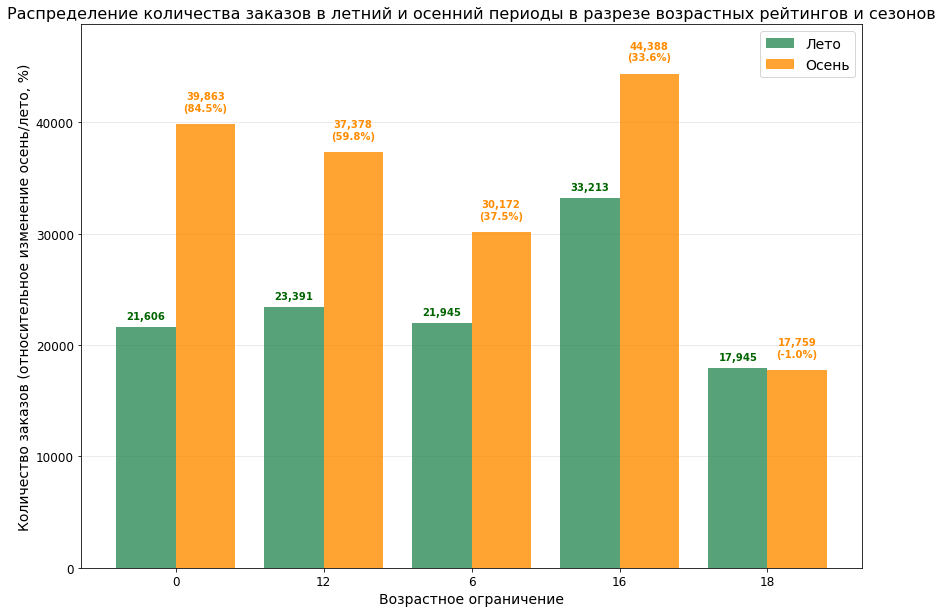

In [72]:
# Отсортируем данные по убыванию величины относительной разницы количества заказов
tickets_dynamic_age_sorted = tickets_dynamic_age.sort_values('share_diff', ascending=False)

x_labels = tickets_dynamic_age_sorted['age_limit'].astype(str)
x = np.arange(len(x_labels))
y1 = tickets_dynamic_age_sorted['лето']
y2 = tickets_dynamic_age_sorted['осень']
width = 0.4

# Строим столбчатые диаграммы. Разобъем график на две отдельные диаграммы, чтобы была видна относительная разница в значениях
fig, ax = plt.subplots(figsize=(14, 10))

# Летние значения
ax.bar(x-width/2, y1, width,
       label='Лето',
       color='seagreen',
       alpha=0.8,
       zorder=3)

# Осенние значения
ax.bar(x+width/2, y2, width,
       label='Осень',
       color='darkorange',
       alpha=0.8,
       zorder=3)

# Подпишем значения относительных изменений осенних значений
for i, (val1, val2, change) in enumerate(zip(y1, y2, tickets_dynamic_age_sorted['share_diff'])):
    # Летние значения
    ax.text(i-width/2, val1 + 1000, f"{val1:,}", ha='center', va='center',
            fontsize=10, color='darkgreen', fontweight='semibold')
    
    # Осенние значения
    ax.text(i+width/2, val2 + 1000, f"{val2:,}\n({change:.1f}%)", ha='center', va='bottom',
            fontsize=10, color='darkorange', fontweight='semibold')

# Настроим верхнюю границу диаграммы
ymax = max(y1.max(), y2.max())
ax.set_ylim(0, ymax * 1.1)

ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Количество заказов (относительное изменение осень/лето, %)')
ax.set_xlabel('Возрастное ограничение')
ax.set_title('Распределение количества заказов в летний и осенний периоды в разрезе возрастных рейтингов и сезонов')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.show()

В осенний период тренд на рост числа заказов сохранился и в разрезе возрастных рейтингов, за исключением категории `18+`.    
Распределение числа заказов по возрастным рейтингам более равномерное, в отличие от типов мероприятий, эффекта низкой базы не наблюдается.   
Наибольший рост был в категории `для всех возрастов (0)` и составил **84.5%**, дойдя **с 21 606 до 39 863** заказов.
В остальных категориях следующие изменения:
* `6+` рост 37.5% с 21 945 до 30 172 заказов;
* `12+` рост на 59.8% с 23 391 до 37 378 заказов;
* `16+` рост на 33.6% с 33 213 до 44 388 заказов;
* `18+` спад на 1% с 17 945 до 17 759 заказов, однако следует учитывать, что результаты посчитаны по данным за 2 осенних месяца, тогда как летний сезон охвачен за все 3 месяца. Таким образом за весь осенний сезон ожидается рост относительно лета.

#### 3.1.3 Динамика выручки с одного билета

In [73]:
# Посчитаем среднюю выручку за билет по типам мероприятий и сезонам
tickets_revenue_dynamic = (orders_events.groupby(['event_type_main', 'season'], as_index=False).agg(
    avg_revenue_by_ticket=('one_ticket_revenue_rub', 'mean'))
)

# Создадим из датафрейма сводную таблицу
tickets_revenue_dynamic = tickets_revenue_dynamic.pivot(
    index='event_type_main',
    columns='season',
    values='avg_revenue_by_ticket'
).reset_index()

# Посчитаем относительное изменение осенних значений относительно летних
tickets_revenue_dynamic['share_diff'] = ((tickets_revenue_dynamic['осень'] - tickets_revenue_dynamic['лето']) / tickets_revenue_dynamic['лето'] * 100)

In [74]:
# Взглянем на таблицу
tickets_revenue_dynamic

season,event_type_main,лето,осень,share_diff
0,выставки,86.4161987,91.0666199,5.3814230
1,другое,82.8947601,81.0521088,-2.2228804
2,концерты,323.2220459,276.8730774,-14.3396673
3,спорт,56.3906021,53.9558563,-4.3176446
4,стендап,221.2843475,232.6263580,5.1255369
5,театр,218.7265472,179.7046356,-17.8404999
6,ёлки,274.7495422,234.2161560,-14.7528496


Таблица с данными подготовлена, перейдем к построению визуализации. Будем использовать столбчатую диаграмму.

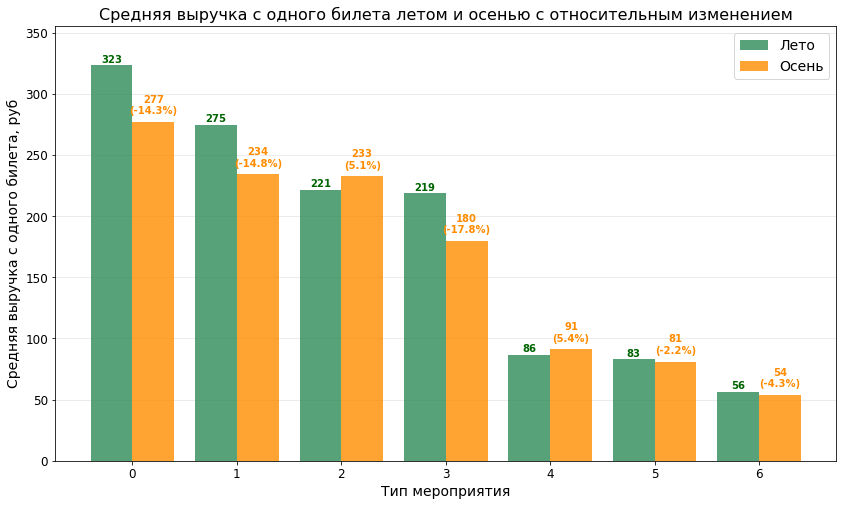

In [75]:
# Отсортируем данные по убыванию летних значений
pivot_sorted = tickets_revenue_dynamic.sort_values('лето', ascending=False)

# Подготовим значения для осей графика
x = np.arange(len(pivot_sorted))
y1 = pivot_sorted['лето']
y2 = pivot_sorted['осень']

width = 0.4

# Строим столбчатые диаграммы. Разобъем график на две отдельные диаграммы, чтобы была видна относительная разница в значениях
fig, ax = plt.subplots(figsize=(14, 8))

# Летние значения
ax.bar(x-width/2,y1, width,
       label='Лето',
       color='seagreen',
       zorder=3,
       alpha=0.8
      )

# Осенние значения
ax.bar(x+width/2, y2, width,
       bottom=0,
       label='Осень',
       color='darkorange',
       zorder=3,
       alpha=0.8
      )

# Подпишем значения относительных изменений осенних значений
for i, (val1, val2, change) in enumerate(zip(y1, y2, pivot_sorted['share_diff'])):
    # Летние значения
    ax.text(i-width/2, val1 + 5,
            f"{val1:.0f}", ha='center', va='center',
            fontsize=10, color='darkgreen', fontweight='semibold')
    # Осенние значения
    ax.text(i+width/2, val2 + 5,
            f"{val2:.0f}\n({change:.1f}%)", ha='center', va='bottom',
            fontsize=10, color='darkorange', fontweight='semibold')

ymax = max(y1.max(), y2.max())
ax.set_ylim(0, ymax * 1.1)
    
ax.set_ylabel('Средняя выручка с одного билета, руб')
ax.set_xlabel('Тип мероприятия')
ax.set_title('Средняя выручка с одного билета летом и осенью с относительным изменением')
ax.legend()
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

В осенний период средняя выручка с одного билета в целом показала падение. Рост был в двух категориях: `стендап` и `выставки`. При этом падение вдругих категориях в относительных величинах было более заметным и, что важно, в наиболее маржинальных категориях, таких как:
* `концерты` — спад (**-14.3%**),
* `ёлки` — спад (**-14.8%**),
* `театр` — спад (**-17.8%**).

Однокато `стендап` также входит в число наиболее маржинальных, здесь относительный рост был **+5.1%**.


---

#### 3.1.4 Промежуточный вывод

С наступлением осени наблюдается значительное увеличение числа заказов, особенно в популярных и сезонных категориях, однако рост количества сопровождается снижением средней выручки с одного билета в наиболее маржинальных сегментах. Это указывает на увеличение активности пользователей при некотором компромиссе по средней стоимости, что может быть связано с сезонными акциями, скидками или изменением структуры заказов.


---

### 3.2 Осенняя активность пользователей

Подготовим данные для дальнейшего анализа осени 2024 по дням.   
Рассчитаем следующие значения:
* общее количество заказов;
* количество активных пользователей `DAU`;
* среднее число заказов на одного пользователя;
* средняя стоимость одного билета.

In [76]:
# Отфильтруем данные, оставив только осенний период
autumn = orders_events[orders_events['season'] == 'осень']

# Создадим сводную таблицу для подсчета количества заказов, DAU, количества билетов и общей выручки по дням
autumn_daily = pd.pivot_table(
    autumn,
    index=autumn['created_dt_msk'],
    values=['order_id', 'user_id', 'tickets_count', 'one_ticket_revenue_rub'],
    aggfunc={
        'order_id': 'count',
        'user_id': 'nunique',
        'one_ticket_revenue_rub': 'mean'
    }
).rename(columns={
    'order_id': 'total_orders',
    'user_id': 'dau',
    'one_ticket_revenue_rub': 'avg_ticket_revenue'
}).reset_index()

# Считаем среднее количество заказов на одного пользователя
autumn_daily['avg_orders_per_user'] = round(autumn_daily['total_orders'] / autumn_daily['dau'], 2)

# Добавим столбец 'is_weekend', чтобы отделить выходные дни от будних. Значение '1' будет в случае,
# если день является выходным и '0', если день будний
autumn_daily['is_weekend'] = (autumn_daily['created_dt_msk'].dt.dayofweek >=5).astype('int')

# Добавим столбец с неделей, он понадобится для подсчета минимумов и максимумов внутри недель
autumn_daily['week'] = autumn_daily['created_dt_msk'].dt.isocalendar().week

In [77]:
autumn_daily

,created_dt_msk,avg_ticket_revenue,total_orders,dau,avg_orders_per_user,is_weekend,week
0,2024-09-01,209.4328461,1346,569,2.3700000,1,35
1,2024-09-02,203.9137268,1381,574,2.4100000,0,36
2,2024-09-03,84.0404510,5112,778,6.5700000,0,36
3,2024-09-04,198.2479401,1774,687,2.5800000,0,36
4,2024-09-05,205.8450928,1943,740,2.6300000,0,36
...,...,...,...,...,...,...,...
56,2024-10-27,190.0525360,2861,1036,2.7600000,1,43
57,2024-10-28,174.7730408,2851,987,2.8900000,0,44
58,2024-10-29,190.2105865,2883,1002,2.8800000,0,44
59,2024-10-30,191.3071594,2949,1046,2.8200000,0,44


#### 3.2.1 Динамика общего количества заказов и количества активных пользователей (`DAU`)

Визуализируем динамику с помощью линейных графиков, расположенных рядом.

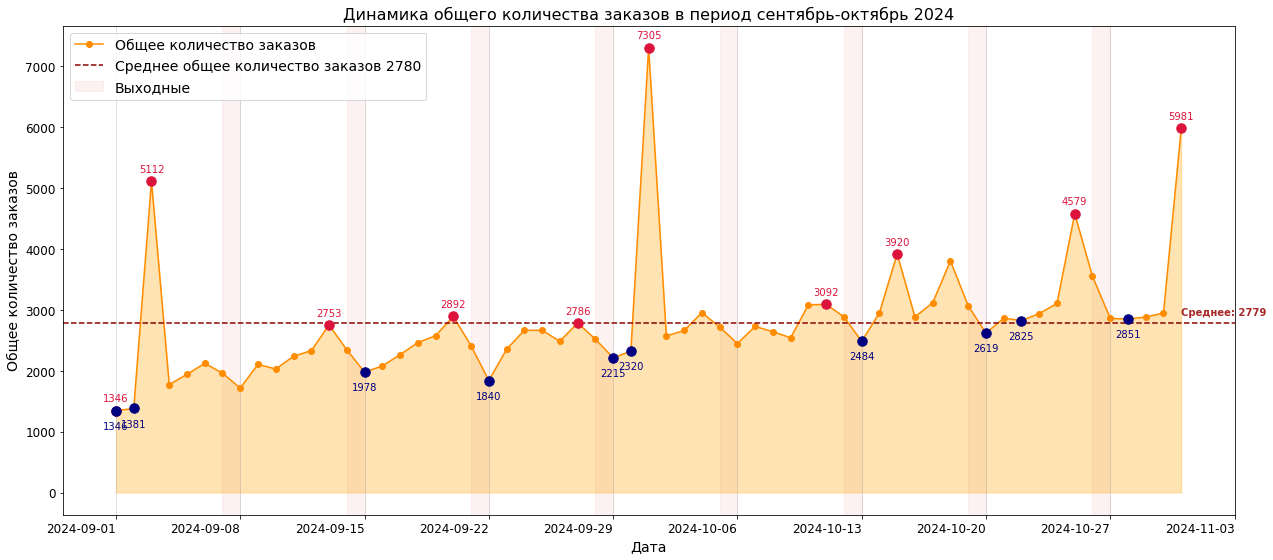

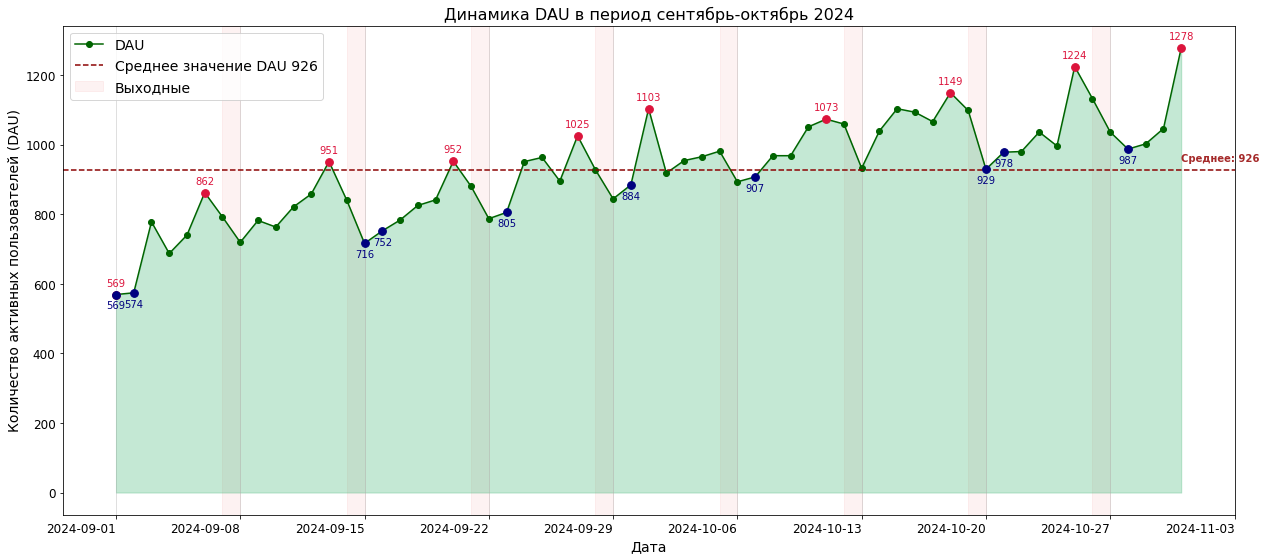

In [78]:
# Посчитаем среднее значение метрики, далее нанесем на график в виде вспомогательной линии
mean_total_orders = autumn_daily['total_orders'].mean()

# Строим линейный график
plt.figure(figsize=(21, 9))
plt.plot(autumn_daily['created_dt_msk'],
         autumn_daily['total_orders'],
         color='darkorange',
         marker='o',
         label='Общее количество заказов'
        )

# Сделаем заливку цветом под графиком
plt.fill_between(
    autumn_daily['created_dt_msk'],
    autumn_daily['total_orders'],
    color='orange',
    alpha=0.3
)

# Нанесем горизонтальную линию со средним значением метрики за весь период
plt.axhline(y=mean_total_orders, color='darkred', linestyle='--',
            label=f'Среднее общее количество заказов {mean_total_orders:.0f}')
plt.text(autumn_daily['created_dt_msk'].iloc[-1], mean_total_orders+100, 
         f'Среднее: {int(mean_total_orders)}', 
         color='brown', va='bottom', ha='left', fontsize=10, fontweight='semibold')

# Нанесем подписи значений только для локальных минимумов и максимумов внутри недель
for week, group in autumn_daily.groupby('week'):
    # Подписываем максимумы
    max_day = group.loc[group['total_orders'].idxmax()]
    plt.scatter(max_day['created_dt_msk'], max_day['total_orders'],
                color='crimson', s=90, zorder=3)
    plt.text(max_day['created_dt_msk'], max_day['total_orders']+150,
             str(max_day['total_orders']), color='crimson', ha='center', fontsize=10)
    # Подписываем минимумы
    min_day = group.loc[group['total_orders'].idxmin()]
    plt.scatter(min_day['created_dt_msk'], min_day['total_orders'],
                color='navy', s=90, zorder=3)
    plt.text(min_day['created_dt_msk'], min_day['total_orders']-300,
             str(min_day['total_orders']), color='navy', ha='center', fontsize=10)

# Выходные дни выделим цветом
ax = plt.gca()
first = True
for day in autumn_daily['created_dt_msk']:
    if day.weekday() == 5:
        if first:
            ax.axvspan(day, day + pd.Timedelta(days=1),
                       color='lightcoral', alpha=0.1, zorder=0, label='Выходные')
            first = False
        else:
            ax.axvspan(day, day + pd.Timedelta(days=1),
                       color='lightcoral', alpha=0.1, zorder=0, label='_nolegend_')


# На оси 'x' оставим только даты окончания недель
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(ha='right')
plt.grid(axis='x', alpha=0.5)
plt.xlabel('Дата')
plt.ylabel('Общее количество заказов')
plt.title('Динамика общего количества заказов в период сентябрь-октябрь 2024')
plt.legend(loc='upper left')
plt.show()

# ==========================================================================================================================
# Построим второй график с динамикой DAU
# ==========================================================================================================================

# Посчитаем среднее значение метрики, далее нанесем на график в виде вспомогательной линии
mean_dau = autumn_daily['dau'].mean()

# Добавим столбец с неделей, он понадобится для подсчета минимумов и максимумов внутри недель
autumn_daily['week'] = autumn_daily['created_dt_msk'].dt.isocalendar().week

# Строим линейный график
plt.figure(figsize=(21, 9))
plt.plot(autumn_daily['created_dt_msk'],
         autumn_daily['dau'],
         color='darkgreen',
         marker='o',
         label='DAU'
        )

# Сделаем заливку цветом под графиком
plt.fill_between(
    autumn_daily['created_dt_msk'],
    autumn_daily['dau'],
    color='mediumseagreen',
    alpha=0.3
)

# Нанесем горизонтальную линию со средним значением метрики за весь период
plt.axhline(y=mean_dau, color='darkred', linestyle='--',
            label=f'Среднее значение DAU {mean_dau:.0f}')
plt.text(autumn_daily['created_dt_msk'].iloc[-1], mean_dau+20, 
         f'Среднее: {int(mean_dau)}', 
         color='brown', va='bottom', ha='left', fontsize=10, fontweight='semibold')

# Нанесем подписи занчений только для локальных минимумов и максимумов внутри недель
for week, group in autumn_daily.groupby('week'):
    # Подписываем максимумы
    max_day = group.loc[group['dau'].idxmax()]
    plt.scatter(max_day['created_dt_msk'], max_day['dau'],
                color='crimson', s=60, zorder=5)
    plt.text(max_day['created_dt_msk'], max_day['dau']+25,
             str(max_day['dau']), color='crimson', ha='center', fontsize=10)
    # Подписываем минимумы
    min_day = group.loc[group['dau'].idxmin()]
    plt.scatter(min_day['created_dt_msk'], min_day['dau'],
                color='navy', s=60, zorder=5)
    plt.text(min_day['created_dt_msk'], min_day['dau']-40,
             str(min_day['dau']), color='navy', ha='center', fontsize=10)

# Выходные дни выделим цветом
ax = plt.gca()
first = True
for day in autumn_daily['created_dt_msk']:
    if day.weekday() == 5:  # суббота
        if first:
            ax.axvspan(day, day + pd.Timedelta(days=1),
                       color='lightcoral', alpha=0.1, zorder=0, label='Выходные')
            first = False
        else:
            ax.axvspan(day, day + pd.Timedelta(days=1),
                       color='lightcoral', alpha=0.1, zorder=0, label='_nolegend_')


# На оси 'x' оставим только даты окончания недель
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(ha='right')
plt.grid(axis='x', alpha=0.5)
plt.xlabel('Дата')
plt.ylabel('Количество активных пользователей (DAU)')
plt.title('Динамика DAU в период сентябрь-октябрь 2024')
plt.legend(loc='upper left')
plt.show()

На обоих графика видна общая тенденция роста активности.   
По диаграмме общего числа заказов присутствует 3 выделяющихся пика активности с кратным ростом метрики: 
* 3 сентября скачок вверх **с 1381 до 5112 заказов**;
* 31 сентября скачок вверх **с 2320 до 7305 заказов**, что было максимумом за рассматриваемый период;
* 31 октября скачок вверх **с ~2900 до 2981 заказа**.
В то же время на графике DAU динамика метрики схожая, те же скачки видны и на нем, однако относительный рост DAU в эти 3 дня существенно меньший. Таким образом можем отметить существенный рост уже активных пользователей, а не прирост новых и он мог быть связан с:
* проведением акций, спецпредложений;
* выходом крупных популярных мероприятий.

По значениям экстремумов внутри недель видна тенденция к росту активности к концу недели до начала выходных, затем во все выходные дни наблюдается резкий спад. Вероятна связь с тем, что пользователи заинтересованы в организации досуга на ближайшие выходные. 


---

#### 3.2.2 Динамика количества активных пользователей `DAU`

Визуализируем динамику с помощью линейных графиков, расположенных рядом.

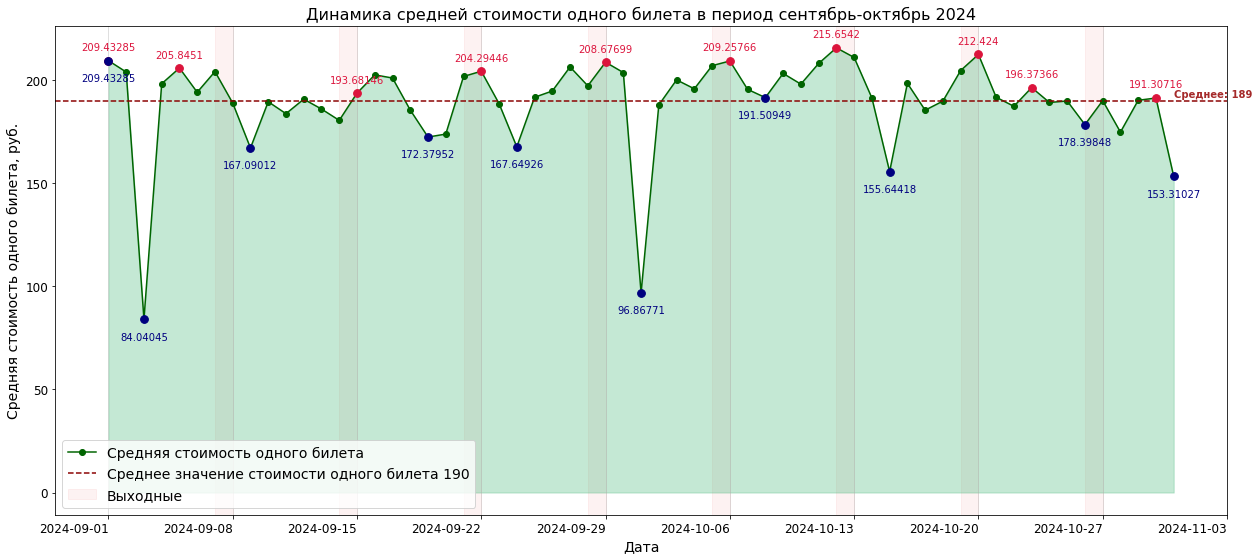

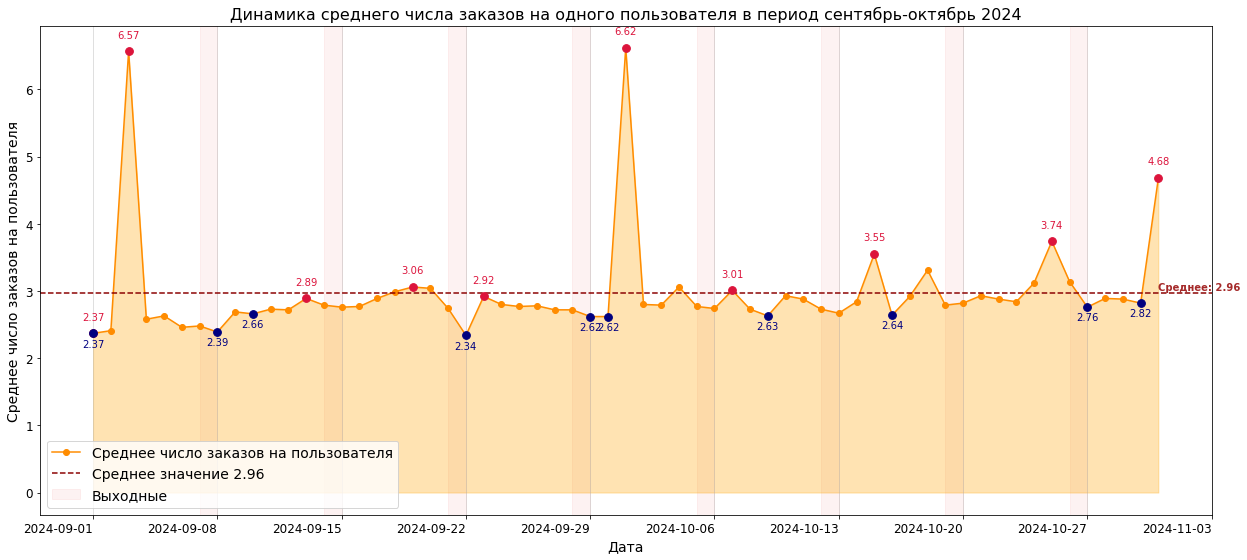

In [79]:
# Строим вторую график — линейный график средней стоимости одного билета
# Посчитаем среднее значение метрики, далее нанесем на график в виде вспомогательной линии
mean_ticket_price = autumn_daily['avg_ticket_revenue'].mean()

# Строим линейный график средней стоимости одного билета
plt.figure(figsize=(21, 9))
plt.plot(autumn_daily['created_dt_msk'],
         autumn_daily['avg_ticket_revenue'],
         color='darkgreen',
         marker='o',
         label='Средняя стоимость одного билета'
        )

# Сделаем заливку цветом под графиком
plt.fill_between(
    autumn_daily['created_dt_msk'],
    autumn_daily['avg_ticket_revenue'],
    color='mediumseagreen',
    alpha=0.3
)

# Нанесем горизонтальную линию со средним значением метрики за весь период
plt.axhline(y=mean_ticket_price, color='darkred', linestyle='--',
            label=f'Среднее значение стоимости одного билета {mean_ticket_price:.0f}')
plt.text(autumn_daily['created_dt_msk'].iloc[-1], mean_ticket_price+1, 
         f'Среднее: {int(mean_ticket_price)}', 
         color='brown', va='bottom', ha='left', fontsize=10, fontweight='semibold')

# Нанесем подписи занчений только для локальных минимумов и максимумов внутри недель
for week, group in autumn_daily.groupby('week'):
    # Подписываем максимумы
    max_day = group.loc[group['avg_ticket_revenue'].idxmax()]
    plt.scatter(max_day['created_dt_msk'], max_day['avg_ticket_revenue'],
                color='crimson', s=60, zorder=5)
    plt.text(max_day['created_dt_msk'], max_day['avg_ticket_revenue']+5,
             str(max_day['avg_ticket_revenue']), color='crimson', ha='center', fontsize=10)
    # Подписываем минимумы
    min_day = group.loc[group['avg_ticket_revenue'].idxmin()]
    plt.scatter(min_day['created_dt_msk'], min_day['avg_ticket_revenue'],
                color='navy', s=60, zorder=5)
    plt.text(min_day['created_dt_msk'], min_day['avg_ticket_revenue']-10,
             str(min_day['avg_ticket_revenue']), color='navy', ha='center', fontsize=10)

# Выходные дни выделим цветом
ax = plt.gca()
first = True
for day in autumn_daily['created_dt_msk']:
    if day.weekday() == 5:
        if first:
            ax.axvspan(day, day + pd.Timedelta(days=1),
                       color='lightcoral', alpha=0.1, zorder=0, label='Выходные')
            first = False
        else:
            ax.axvspan(day, day + pd.Timedelta(days=1),
                       color='lightcoral', alpha=0.1, zorder=0, label='_nolegend_')


# На оси 'x' оставим только даты окончания недель
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(ha='right')
plt.grid(axis='x', alpha=0.5)
plt.xlabel('Дата')
plt.ylabel('Средняя стоимость одного билета, руб.')
plt.title('Динамика средней стоимости одного билета в период сентябрь-октябрь 2024')
plt.legend(loc='lower left')
plt.show()

# ==========================================================================================================================
# Построим второй график с динамикой среднего числа заказов на одного пользователя
# ==========================================================================================================================

# Посчитаем среднее значение метрики
mean_avg_orders = autumn_daily['avg_orders_per_user'].mean()

# Добавим столбец с неделей (если ещё не добавлен)
autumn_daily['week'] = autumn_daily['created_dt_msk'].dt.isocalendar().week

# Строим линейный график среднего числа заказов на одного пользователя
plt.figure(figsize=(21, 9))
plt.plot(autumn_daily['created_dt_msk'],
         autumn_daily['avg_orders_per_user'],
         color='darkorange',
         marker='o',
         label='Среднее число заказов на пользователя'
        )

# Сделаем заливку цветом под графиком
plt.fill_between(
    autumn_daily['created_dt_msk'],
    autumn_daily['avg_orders_per_user'],
    color='orange',
    alpha=0.3
)

# Нанесем горизонтальную линию со средним значением за весь период
plt.axhline(y=mean_avg_orders, color='darkred', linestyle='--',
            label=f'Среднее значение {mean_avg_orders:.2f}')
plt.text(autumn_daily['created_dt_msk'].iloc[-1], mean_avg_orders + 0.02, 
         f'Среднее: {mean_avg_orders:.2f}', 
         color='brown', va='bottom', ha='left', fontsize=10, fontweight='semibold')

# Нанесем подписи значений только для локальных минимумов и максимумов внутри недель
for week, group in autumn_daily.groupby('week'):
    # Подписываем максимумы
    max_day = group.loc[group['avg_orders_per_user'].idxmax()]
    plt.scatter(max_day['created_dt_msk'], max_day['avg_orders_per_user'],
                color='crimson', s=60, zorder=5)
    plt.text(max_day['created_dt_msk'], max_day['avg_orders_per_user'] + 0.2,
             f"{max_day['avg_orders_per_user']:.2f}", color='crimson', ha='center', fontsize=10)
    # Подписываем минимумы
    min_day = group.loc[group['avg_orders_per_user'].idxmin()]
    plt.scatter(min_day['created_dt_msk'], min_day['avg_orders_per_user'],
                color='navy', s=60, zorder=5)
    plt.text(min_day['created_dt_msk'], min_day['avg_orders_per_user'] - 0.2,
             f"{min_day['avg_orders_per_user']:.2f}", color='navy', ha='center', fontsize=10)

# Выходные дни выделим цветом
ax = plt.gca()
first = True
for day in autumn_daily['created_dt_msk']:
    if day.weekday() == 5:  # суббота
        if first:
            ax.axvspan(day, day + pd.Timedelta(days=1),
                       color='lightcoral', alpha=0.1, zorder=0, label='Выходные')
            first = False
        else:
            ax.axvspan(day, day + pd.Timedelta(days=1),
                       color='lightcoral', alpha=0.1, zorder=0, label='_nolegend_')

# На оси 'x' оставим только даты окончания недель
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(ha='right')
plt.grid(axis='x', alpha=0.5)
plt.xlabel('Дата')
plt.ylabel('Среднее число заказов на пользователя')
plt.title('Динамика среднего числа заказов на одного пользователя в период сентябрь-октябрь 2024')
plt.legend(loc='lower left')
plt.show()

В отличие от предыдущего исследования по метрикам активности пользователей и числа заказов, динамика среднего числа заказов на одного пользователя и средней стоимости одного билета в осенний месяцы была в большей степени стабильна и метрики находились вблизи своих средних значений за весь период.   
Здесь так же видим аналогичные всплески по тем же датам: 3 и 31 сентября, 31 октября. При этом среднее число заказов на одного пользователя ожидаемо возросло вслед да ростом количества заказов, а средняя стоимость билетов в эти дни наоборот показала резкий спад.   
Это укладывается как в логику указанного ранее предположения о возможных акциях и спецпредложениях, так и проведением крупного и популярного события с дешевыми билетами.


---

### 3.3 Популярные события и партнеры

Сначала подготовим данные для исследования и визулизаций. Сформируем две таблицы:
* `region_share`,  где посчитаем уникальное количество мероприятий и общее число заказов;
* `service_share`, где посчитаем уникальное количество мероприятий и общую выручку.

Данные таблицы `region_share` отсортируем данные по убыванию числа заказов и уникального количества мероприятий.   
Данные таблицы `service_share` отсортируем по убыванию общей выручки и уникального количества мероприятий.   
Посчитаем, сколько всего задействовано регионов и билетных партнеров, а визуализации сделаем для топ-10 из них.   

Рассматривать будем активность за осень 2024.

In [80]:
# Группируем данные по названию региона, считаем уникальное количество мероприятий и количество заказов
# Оставляем только данные за осенний сезон
region_share = autumn.groupby('region_name').agg(
    total_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count')
).reset_index().sort_values(by=['total_orders', 'total_events'], ascending=False)

In [81]:
# Выведем топ-10 на экран
region_share.head(10)

,region_name,total_events,total_orders
23,каменевский регион,3930,47265
59,североярская область,2620,20853
41,медовская область,369,12047
75,широковская область,803,8739
44,озернинский край,296,7579
56,светополянский округ,764,4819
40,малиновоярский округ,137,4605
60,серебринская область,456,4477
63,солнечноземская область,403,4232
76,яблоневская область,432,4222


In [82]:
region_count = region_share['region_name'].nunique()
region_events = region_share['total_events'].sum().astype(int)
region_orders = region_share['total_orders'].sum().astype(int)

print(f"Итого данные охватывают {region_count} регионов. Их общее число заказов с {region_events} мероприятий составило {region_orders}.")

Итого данные охватывают 79 регионов. Их общее число заказов с 15905 мероприятий составило 169560.


In [83]:
# Группируем данные по организаторам мероприятий, считаем уникальное количество мероприятий и общую выручку
# Оставляем только данные за осенний сезон
service_share = orders_events[orders_events['season'] == 'осень'].groupby('service_name').agg(
    total_events=('event_id', 'nunique'),
    total_revenue=('revenue_rub', 'sum')
).reset_index().sort_values(by=['total_revenue', 'total_events'], ascending=False)

In [84]:
# Выведем топ-10 на экран
service_share.head(10)

,service_name,total_events,total_revenue
3,билеты без проблем,2853,"12,818,644.0000000"
24,мой билет,1010,"11,392,605.0000000"
25,облачко,1412,"10,887,838.0000000"
21,лови билет!,3621,"10,572,526.0000000"
8,весь в билетах,607,"9,808,426.0000000"
5,билеты в руки,2471,"7,687,577.0000000"
19,край билетов,193,"3,176,579.7500000"
34,яблоко,537,"2,827,527.7500000"
26,прачечная,728,"2,647,691.5000000"
30,тебе билет!,859,"2,223,909.2500000"


In [85]:
service_count = service_share['service_name'].nunique()
service_events = service_share['total_events'].sum().astype(int)
service_revenue = service_share['total_revenue'].sum().astype(int)

print(f"Итого данные охватывают {service_count} партнеров. Их общая выручка с {service_events} мероприятий составила {service_revenue} рублей.")

Итого данные охватывают 35 партнеров. Их общая выручка с 17331 мероприятий составила 85063248 рублей.


#### 3.3.1 Визуализация топ-10 регионов по количеству заказов и уникальному количеству мероприятий

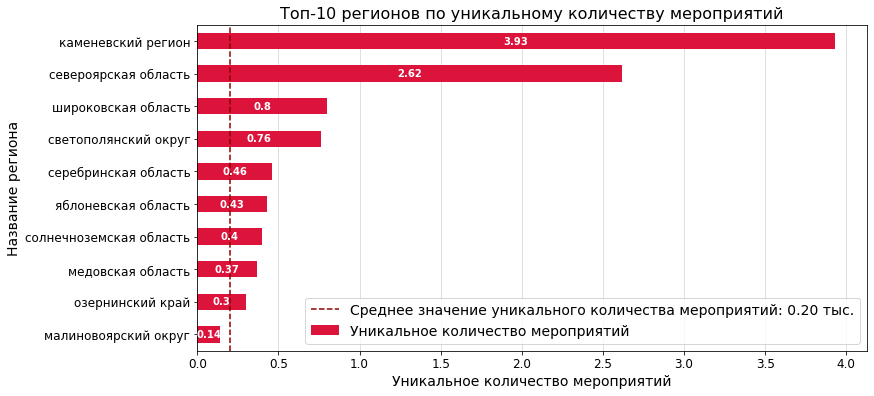

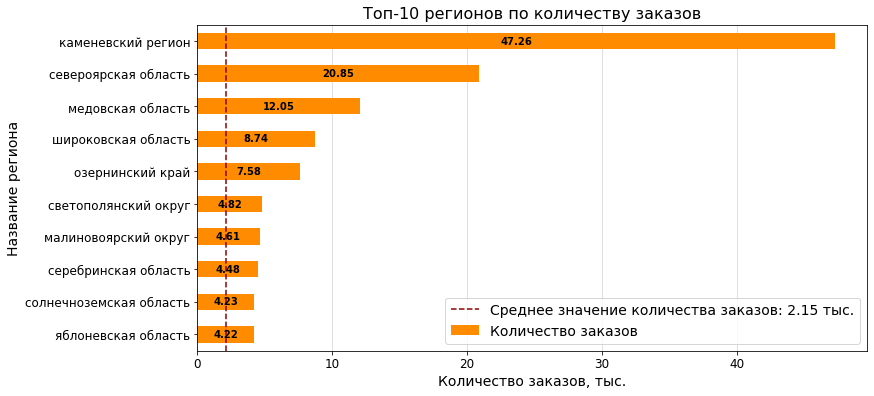

In [86]:
# Отсортируем данные по возрастанию метрик для обеих диаграмм
region_top_events = region_share.head(10).sort_values(by='total_events', ascending=True)
region_top_orders = region_share.head(10).sort_values(by='total_orders', ascending=True)

# Посчитаем средние значения метрик для нанесения вспомогательных линий на графики
region_orders_mean = round(region_share['total_orders'].mean() / 1000, 2)
region_events_mean = round(region_share['total_events'].mean() / 1000, 2)

# Для удобства выразим значения метрик в тысячах
region_top_orders['total_orders'] = round(region_top_orders['total_orders'] / 1000, 2)
region_top_events['total_events'] = round(region_top_events['total_events'] / 1000, 2)

# Строим горизонтальную столбчатую диаграмму по уникальному количеству мероприятий в регионах
ax1 = region_top_events.plot(kind='barh',
                             x='region_name',
                             y='total_events',
                             color='crimson',
                             label='Уникальное количество мероприятий',
                             zorder=2,
                             figsize=(12, 6)
                            )

# Нанесем горизонтальную линию со средним значением метрики среди всех регионов
ax1.axvline(x=region_events_mean,
            color='darkred',
            linestyle='--',
            label=f'Среднее значение уникального количества мероприятий: {region_events_mean:.2f} тыс.'
)

# Нанесем подписи со значениями метрики на столбцы
for bar in ax1.patches:
    value = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax1.text(
        value * 0.5, y,
        f"{value}",
        va='center', ha='center', color='white', fontsize=10, fontweight='semibold'
    )

ax1.set_title('Топ-10 регионов по уникальному количеству мероприятий')
ax1.set_xlabel('Уникальное количество мероприятий')
ax1.set_ylabel('Название региона')
ax1.grid(axis='x', alpha=0.5)
plt.legend()
plt.show()

# Строим горизонтальную столбчатую диаграмму по общему количеству заказов в регионах
ax2 = region_top_orders.plot(kind='barh',
                             x='region_name',
                             y='total_orders',
                             color='darkorange',
                             label='Количество заказов',
                             zorder=2,
                             figsize=(12, 6)
                            )

# Нанесем горизонтальную линию со средним значением метрики среди всех регионов
ax2.axvline(x=region_orders_mean,
            color='darkred',
            linestyle='--',
            label=f'Среднее значение количества заказов: {region_orders_mean:.2f} тыс.'
)

# Нанесем подписи со значениями метрики на столбцы
for bar in ax2.patches:
    value = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax2.text(
        value * 0.5, y,
        f"{value}",
        va='center', ha='center', color='black', fontsize=10, fontweight='semibold'
    )

ax2.set_title('Топ-10 регионов по количеству заказов')
ax2.set_xlabel('Количество заказов, тыс.')
ax2.set_ylabel('Название региона')
ax2.grid(axis='x', alpha=0.5)
plt.legend()
plt.show()

По топам регионов видим двух явных лидеров:
* `каменевский регион` с **3.93 тыс.** мероприятий и **47.26 тыс.** заказами;
* `североярская область` с **2.62 тыс.** мероприятий и **20.85 тыс.** заказами.

Остальные регионы отстают по уникальному числу мероприятий от лидеров кратно с показателями от **137** в `малиновоярском округе`, что даже ниже среднего значения среди всех регионов (**201**), до **803** у `широковской области`.   
По количеству заказов ощутимую конкуренцию могут составить еще 3 региона:
* `медовская область` с **12.05 тыс.** заказами;
* `широковская область` с **8.74 тыс.** заказами;
* `озернинский край` с **7.58 тыс.** заказами.

В остальных регионах метрика различается несущественно между собой и находится в диапазоне **от 4.22 тыс. до 4.82 тыс. заказов**.


---

### 3.3.2 Визуализация топ-10 билетных партнеров по общей выручке и уникальному количеству мероприятий

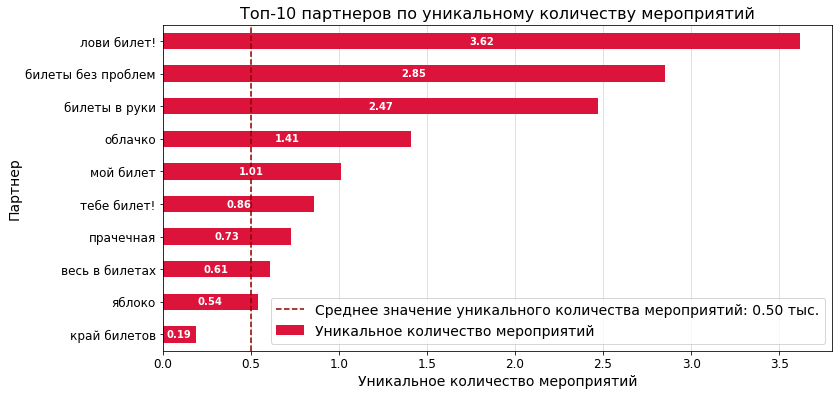

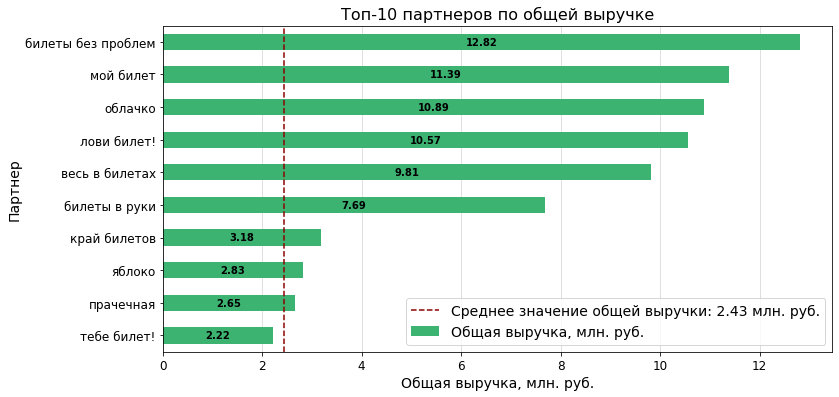

In [87]:
# Отсортируем данные по возрастанию метрик для обеих диаграмм
service_top_events = service_share.head(10).sort_values(by='total_events', ascending=True)
service_top_revenue = service_share.head(10).sort_values(by='total_revenue', ascending=True)

# Выручку выразим в миллионах, а количество мероприятий в тысячах для большей компактности
service_top_revenue['total_revenue'] = round(service_top_revenue['total_revenue'] / 1000000, 2)
service_top_events['total_events'] = round(service_top_events['total_events'] / 1000, 2)

# Посчитаем средние значения метрик для нанесения вспомогательных линий на графики
service_revenue_mean = round(service_share['total_revenue'].mean() / 1000000, 2)
service_events_mean = round(service_share['total_events'].mean() / 1000, 2)

# Строим горизонтальную столбчатую диаграмму по уникальному количеству мероприятий в разрезе билетных партнеров
ax1 = service_top_events.plot(kind='barh',
                              x='service_name',
                              y='total_events',
                              color='crimson',
                              label='Уникальное количество мероприятий',
                              zorder=2,
                              figsize=(12, 6)
)

# Нанесем вертикальную линию со средним значением метрики
ax1.axvline(x=service_events_mean,
            color='darkred',
            linestyle='--',
            label=f'Среднее значение уникального количества мероприятий: {service_events_mean:.2f} тыс.'
)


# Нанесем подписи со значениями метрики на столбцы
for bar in ax1.patches:
    value = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax1.text(
        value * 0.5, y,
        f"{value}",
        va='center', ha='center', color='white', fontsize=10, fontweight='semibold'
    )

ax1.set_title('Топ-10 партнеров по уникальному количеству мероприятий')
ax1.set_xlabel('Уникальное количество мероприятий')
ax1.set_ylabel('Партнер')
ax1.grid(axis='x', alpha=0.5)
plt.legend()
plt.show()

# Строим горизонтальную столбчатую диаграмму по общей выручке в разрезе билетных партнеров
ax2 = service_top_revenue.plot(kind='barh',
                               x='service_name',
                               y='total_revenue',
                               color='mediumseagreen',
                               label='Общая выручка, млн. руб.',
                               zorder=2,
                               figsize=(12, 6)
                              )

# Нанесем вертикальную линию со средним значением метрики
ax2.axvline(x=service_revenue_mean,
            color='darkred',
            linestyle='--',
            label=f'Среднее значение общей выручки: {service_revenue_mean:.2f} млн. руб.'
           )

# Нанесем подписи со значениями метрики на столбцы
for bar in ax2.patches:
    value = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax2.text(
        value * 0.5, y,
        f"{value}",
        va='center', ha='center', color='black', fontsize=10, fontweight='semibold'
    )

ax2.set_title('Топ-10 партнеров по общей выручке')
ax2.set_xlabel('Общая выручка, млн. руб.')
ax2.set_ylabel('Партнер')
ax2.grid(axis='x', alpha=0.5)
plt.legend()
plt.show()


Среди партнеров явными лидерами отметим следующих:
* `билеты без проблем` с выручкой в **12.82 млн. руб.** и **2.85 тыс.** мероприятий;
* `мой билет` с выручкой в **11.39 млн. руб.**, однако по числу мероприятий отстает от других партнеров (**1.01 тыс.**) и занимает 5-ю строчку;
* `облачко` с выручкой в **10.89 млн. руб.** и **1.41 тыс.** мероприятий;
* `лови билет!` с выручкой в **10.57 млн. руб.** и **3.62 тыс.** мероприятий, в чем этот партнер опережает всех остальных;
* `весь в билетах` с выручкой в **9.81 млн. руб.** и **0.61 тыс.** мероприятий, что уже близко к среднему значению в **0.5 тыс.**
* `билеты в руки`с выручкой в **7.69 млн. руб.** и **2.47 тыс.** мероприятий.

У перечисленных выше партнеров выручка существенно выше среднего значения.

По количеству мероприятий существенно выше среднего уровня метрика у следующих партнеров:
* `лови билет` — 3.62 тыс.;
* `билеты без проблем` — 2.85 тыс.;
* `облачко` — 2.47 тыс.;
* `мой билет` — 1.41 тыс.;
* `тебе билет!` — 1.01 тыс.

---

## 4. Статистический анализ данных

В этой части проверим несколько гипотез относительно активности пользователей мобильных и стационарных устройств, которые предполагают большую активность пользователей мобильных устройств:
* Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
* Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.


---

### 4.1 Проверка распределения в выборках

Для начала проверим тестовые группы на возможные пересечения.

In [88]:
columns = ['device_type_canonical', 'user_id', 'order_id', 'days_since_prev']
devices_test = orders_events[(orders_events['season'] == 'осень') &
                             (orders_events['days_since_prev'].notna())][columns]

In [89]:
intersection = devices_test[devices_test['device_type_canonical'] == 'mobile'].isin(devices_test[(devices_test['device_type_canonical'] == 'desktop')])['user_id'].sum()
print(f"В двух выборках одновременно присутствуют {intersection} пользователей")

В двух выборках одновременно присутствуют 0 пользователей


In [90]:
devices_test.head()

,device_type_canonical,user_id,order_id,days_since_prev
2,mobile,0005ca5e93f2cf4,7292370,75
4,mobile,000898990054619,972400,83
5,mobile,000898990054619,2613713,19
8,mobile,000a55a418c128c,4657952,16
27,mobile,001e7037d013f0f,2303442,74


Пересечений в выборках нет, проверим, равномерно ли распределены пользователи по типам устройств, сделаем расчет метрик для проверки гипотез:
* среднее количество заказов на одного пользователя;
* среднее время между заказами.

In [91]:
# Сгруппируем данные по типам устройств, посчитаем количество пользователей
test_distrubution = devices_test.groupby('device_type_canonical').agg(
    total_users=('user_id', 'nunique')
).reset_index()

In [92]:
# Сгруппируем данные по типам устройств, оставив только осенний период, и посчитаем необходимые для проверки гипотез метрики
test_distrubution = devices_test.groupby('device_type_canonical').agg(
    total_users=('user_id', 'nunique'),
).reset_index()

In [93]:
test_distrubution

,device_type_canonical,total_users
0,desktop,4042
1,mobile,10192


Видим, что группы неравномерны, и пользователей мобильных устройств кратно больше, чем пользователей десктопов.   
Визуализируем абсолютные и относительные величины с помощью круговой диаграммы.

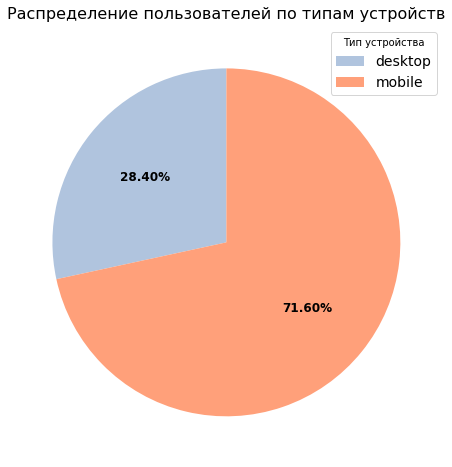

In [94]:
# Строим круговую диаграмму
plt.figure(figsize=(8, 8))

plt.pie(test_distrubution['total_users'],
        labels=None,
        autopct='%1.2f%%',
        startangle=90,
        colors=['lightsteelblue', 'lightsalmon'],
        textprops={'fontsize': 12, 'fontweight': 'semibold'}
)
plt.title('Распределение пользователей по типам устройств')
plt.legend(test_distrubution['device_type_canonical'], title="Тип устройства")
plt.show()

Теперь разница в размерах групп видна наглядно: 28.4% пользователей десктопов и 71.6% пользователей мобильных устройств.

Далее рассчитаем необходимый размер выборки и оценим, достаточно ли пользователей в группах.   



---

### 4.2 Рассчет необходимого размера выборок

Зададим параметры теста:

In [95]:
# Уровень значимости
alpha = 0.05
# Вероятность ошибки второго рода
beta = 0.2
# Базовый уровень конверсии
p = 0.3 
# Минимально-детектируемый эффект
mde = 0.03
# Мощность теста
power = 1 - beta

In [96]:
# Запускаем тест
effect_size = proportion_effectsize(p, p + mde)

power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 3761


В наименьшей группе с пользователями ПК 4042 пользователя, следовательно размер выборок достаточен для проведения тестах при заданных параметрах.

---

### 4.2 Проверка продуктовых гипотез

#### 4.2.1 Проверка первой гипотезы

Сформулируем **нулевую** и **альтернативную** гипотезы:
* **Нулевая гипотеза**: $H_0: \mu_{\text{mobile}} = \mu_{\text{desktop}}$ <br> Cреднее количество заказов на одного пользователя мобильного приложения не выше, чем у пользователя стационарного устройства.
* **Альтернативная гипотеза**: $H_1: \mu_{\text{mobile}} > \mu_{\text{desktop}}$ Cреднее количество заказов на одного пользователя мобильного приложения выше, чем у пользователя стационарного устройства и эта разница статистически значима.

In [97]:
mobile_orders = devices_test[devices_test['device_type_canonical'] == 'mobile'].groupby('user_id')['order_id'].count()

desktop_orders = devices_test[devices_test['device_type_canonical'] == 'desktop'].groupby('user_id')['order_id'].count()

In [98]:

alpha = 0.05

t_stat, p_value = ttest_ind(mobile_orders,
                            desktop_orders,
                            equal_var=False)

# Делаем односторонний тест
p_value /= 2

if (mobile_orders.mean() > desktop_orders.mean()) and (p_value < alpha):
    print(f'p-value={p_value} > {alpha}\n')
    print("Отвергаем нулевую гипотезу.\nСреднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.")
    print(f"Среднее количество заказов на одного пользователя мобильного приложения: {round(mobile_orders.mean(), 2)}")
    print(f"Среднее количество заказов на одного пользователя стационарных устройств: {round(desktop_orders.mean(), 2)}")
else:
    print(f'p-value={p_value} < {alpha}')
    print("Не получилось отвергнуть нулевую гипотезу.\nСреднее количество заказов на одного пользователя мобильного приложения не выше по сравнению с пользователями стационарных устройств.")

p-value=8.897558347958319e-06 > 0.05

Отвергаем нулевую гипотезу.
Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
Среднее количество заказов на одного пользователя мобильного приложения: 12.56
Среднее количество заказов на одного пользователя стационарных устройств: 8.21


Значительно большая популярность мобильного приложения в сравнении со стационарными устройствами привела и к большей конверсии заказов. Так, среднее количество заказов на одного пользователя мобильного приложения составило **12.56**, тогда как для стационарных устройств значение равно **8.21**.   
Есть вероятность, что в мобильном приложении процесс оформления заказа более прост и интуитивен.


---

#### 4.2.2 Проверка второй гипотезы

Сформулируем **нулевую** и **альтернативную** гипотезы:
* **Нулевая гипотеза**: $H_0: \mu_{\text{mobile}} = \mu_{\text{desktop}}$<br> Cреднее время между заказами пользователей мобильных приложений не выше, чем у пользователей стационарых устройств.
* **Альтернативная гипотеза**: $H_1: \mu_{\text{mobile}} > \mu_{\text{desktop}}$<br>Среднее время между заказами пользователей мобильных значений выше, чем у пользователей стационарных устройств и разница между ними статистически значима.

In [99]:
mobile_days = devices_test[devices_test['device_type_canonical'] == 'mobile'].groupby('user_id')['days_since_prev'].mean()

desktop_days = devices_test[devices_test['device_type_canonical'] == 'desktop'].groupby('user_id')['days_since_prev'].mean()

In [100]:
alpha = 0.05

t_stat2, p_val2 = ttest_ind(mobile_days, desktop_days, equal_var=False)  # Welch
p_val2 /= 2  # односторонний
if (mobile_days.mean() > desktop_days.mean()) and (p_val2 < alpha):
    print(f'p-value={p_value} > {alpha}\n')
    print("Отвергаем нулевую гипотезу.\nСреднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.")
    print(f"Среднее количество дней между заказами пользователей мобильного приложения: {(mobile_days.mean()).astype('int')}")
    print(f"Среднее количество дней между заказами пользователей стационарных устройств: {(desktop_days.mean()).astype('int')}")
else:
    print(f'p-value={p_value} < {alpha}')
    print("Не получилось отвергнуть нулевую гипотезу.\nСреднее время между заказами пользователей мобильных приложений не выше по сравнению с пользователями стационарных устройств. ")
    print(f"Среднее количество дней между заказами пользователей мобильного приложения: {(mobile_days.mean()).astype('int')}")
    print(f"Среднее количество дней между заказами пользователей стационарных устройств: {(desktop_days.mean()).astype('int')}")

p-value=8.897558347958319e-06 > 0.05

Отвергаем нулевую гипотезу.
Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
Среднее количество дней между заказами пользователей мобильного приложения: 20
Среднее количество дней между заказами пользователей стационарных устройств: 14


Тест показал, что пользователи мобильных приложений в среднем реже оформляют заказы чем пользователи стационарных устройств. Средние значения составили **20** и **14 дней** соответственно.    
Возможно для улучшения показателей мобильного приложения стоит подключить дополнительные push-уведомления или проверить, насколько регулярно пользователи открывают приложение, ввести бонусную систему за ежедневный вход.


---

## 5. Общий вывод и рекомендации

В рамках проекта были проанализированы данные о заказах билетов сервиса Яндекс Афиша за период с июня по октябрь 2024 года. Данные включали информацию о заказах (тип устройства, выручка, количество билетов в заказе, количество дней между заказами), событиях (тип мероприятия, регион, билетный партнер, возрастной рейтинг) и дополнительный датасет с курсом тенге к рублю.   
После предобработки данные были приведены к единому формату и валюте.

**Основные результаты анализа**:

**Популярность мероприятий**: наибольший спрос наблюдается на концерты и театры, особенно в осенний период. Сезонный рост заказов осенью подтверждается как в абсолютных значениях, так и в относительных долях.

**Выручка**: средняя выручка за один билет осенью держалась приблизительно на уровне летних показателей при этом общая выручка компенсировалась ростом пользовательской активности и за 2 осенних месяца превысила весь летний сезон и составила **85 млн. руб.**, тогда как за лето удалось заработать **66. 7 млн. руб.**

**Пользовательская активность**: осенью увеличилось как общее число заказов, так и количество активных пользователей (`DAU`). В будни активность ниже, чем в выходные, но динамика заказов показывает стабильный рост к осени и в течение осеннего периода.

**Регионы:**: среди регионов есть 2 явных лидера, как по количеству заказов, так и по количеству мероприятий:
* `каменевский регион` с **3.93 тыс.** мероприятий и **47.26 тыс.** заказами;
* `североярская область` с **2.62 тыс.** мероприятий и **20.85 тыс.** заказами.

Для большей диверсификации стоит обратить внимание на регионы в нижней части списка, их показатели намного ближе к средним и их развитие позволит распределить выручку по регионам более равномерно. Отметим следующие регионы:
* `серебринская область`
* `светополянский округ`
* `малиновоярский округ`
* `солнечноземкая область`
* `яблоневская область`


**Билетные партнеры**: в числе самых прибыльных партнеров с выручкой, значительно превышающей среднее занчение оказались:
* `билеты без проблем` с выручкой в **12.82 млн. руб.** и **2.85 тыс.** мероприятий;
* `мой билет` с выручкой в **11.39 млн. руб.**, однако по числу мероприятий отстает от других партнеров (**1.01 тыс.**) и занимает 5-ю строчку;
* `облачко` с выручкой в **10.89 млн. руб.** и **1.41 тыс.** мероприятий;
* `лови билет!` с выручкой в **10.57 млн. руб.** и **3.62 тыс.** мероприятий, в чем этот партнер опережает всех остальных;
* `весь в билетах` с выручкой в **9.81 млн. руб.** и **0.61 тыс.** мероприятий, что уже близко к среднему значению в **0.5 тыс.**
* `билеты в руки`с выручкой в **7.69 млн. руб.** и **2.47 тыс.** мероприятий.

Особое внимание стоит обратить на партнера `мой билет`, занявшего второе место по общей выручке, при этом по количеству мероприятий отстает от лидеров, здесь есть потенциал для роста.

**Статистический анализ**:

* Подтвердилась гипотеза о большем среднем числе заказов на одного пользователя мобильных устройств.

* Подтвердилась гипотеза о большем среднем времени между заказами у пользователей мобильных устройств — пользователи мобильного приложения в среднем реже оформляют заказы чем пользователи стационарных устройств.

**Рекомендации**

**Сезонность**
* Планировать маркетинговые активности с учётом сезонного роста интереса к мероприятиям осенью.
* Использовать летний период для продвижения менее популярных категорий (например, выставок), чтобы компенсировать сезонное снижение спроса.

**Регионы**

* Продолжать развивать лидирующие регионы (каменевский регион, североярская область), где уже сформирован устойчивый спрос.
* Сосредоточить маркетинговые усилия на продвижении в регионах со средними показателями (серебринская область, светополянский округ, малиновоярский округ, солнечноземкая область, яблоневская область). Их потенциал позволит сбалансировать распределение выручки и снизить зависимость от лидирующих регионов.

**Билетные партнёры**

* Поддерживать партнёров-лидеров (билеты без проблем, облачко, лови билет!), обеспечивая стабильный поток мероприятий.
* Рассмотреть возможности роста у партнёра мой билет, который при высоких объёмах выручки показывает относительно низкое количество мероприятий. Возможно, стоит предложить совместные акции или расширение предложения.
* Отслеживать партнёров с показателями близкими к средним, чтобы вовремя выявлять новых лидеров.

**Мобильное приложение**

* Пользователи мобильных устройств делают в среднем больше заказов на одного пользователя, но при этом совершают заказы реже (с большим интервалом).
    * Рекомендуется проработать сценарии удержания и возврата мобильных пользователей: push-уведомления о новых мероприятиях, персонализированные рекомендации, бонусы за повторные покупки, бонусы за регулярный вход в приложение, выполнение целевых действий (например, добавление мероприятий в избранное, добавление билетов в корзину).
    * Для пользователей стационарных устройств можно усиливать стимулы к увеличению числа заказов (например, скидки при покупке нескольких билетов).

**Обобщенная рекомендация**

* Сосредоточиться на сочетании регионального роста, работе с перспективными партнёрами и активной политике удержания мобильных пользователей. Такая стратегия позволит поддерживать высокую выручку в пиковые сезоны и компенсировать спады в сезоны с низкой активностью.